# Importation module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline 

# Fonctions utilisés

In [2]:
#fonction qui donne le taux de remplissage et nous dit les colonnes vides
#nous renseigne aussi le taux de remplissage 
#le taux de valeurs manquantes
def TraceValeurMissing(base):

  col_vides=[]
  for col in base.columns:
      if base[col].isnull().all():
        #all Renvoie True si au moins 
        #un élément de iterable est vrai. False est renvoyé dans 
        #le cas où iterable est vide
          col_vides.append(col)
  print ('les colonnes vides sont:\n\n')
  display(col_vides)#affiche tete de table
  t=pd.DataFrame(index=['number of missing values', 'number of values','fill_rate'], columns=base.columns )
  for col in base.columns:
      nb_nan=base[col].isnull().sum()
      t.loc['number of missing values',col]=nb_nan              
      t.loc['number of values', col]= base.shape[0]-nb_nan 
      t.loc['fill_rate', col]=(base.shape[0]-nb_nan)/(base.shape[0]*1.0)
      #taux de remplissage
  display(t)#pd.set
  dico = {'columns': base.columns, 'fill_rate': (t.loc['fill_rate', base.columns]*100), 'missing_values': (100-t.loc['fill_rate',base.columns]*100)}
  tr = pd.DataFrame(dico)
  tr=tr.sort_values(by='fill_rate', ascending=False) #trier le tableau
  barWidth=0.85#largeur des barres
  plt.figure(figsize=(8,10))
  plt.gca().invert_yaxis()#pour creer des axes polaires valeur d'une graduation
  #taille des graduations
#plt.barh creation dune barre horizontale
  plt.barh(tr['columns'], tr['fill_rate'], color='#a3acff')
  plt.barh(tr['columns'], tr['missing_values'], left=tr['fill_rate'],color ='#b5ffb9')
  plt.title('Taux de remplissage', fontsize=30)
  plt.yticks(fontsize=10)
  plt.ylabel('columns', fontdict={'fontsize' : 20})
  plt.xlabel('fill rate(%)', fontdict={'fontsize' : 20})

  plt.axvline(x=80, color='b')
  plt.text(82, -1, '>80%', color='b')
  plt.axvline(x=20, color='r')
  plt.text(12, -1, '<20%', color='r')
  plt.axvline(x=50,color='g')
  plt.text(50,-1,'>50%',color='b')
  plt.grid(True)


In [3]:
#fonction qui calcule le nombre de pourcentage de valeur manquante
def Missing(Base):
  PVm=((Base.isnull().sum())/Base.shape[0])*100
  PVm.sort_values(ascending=True)
  return PVm

In [4]:
#creation d'une fonction qui prend toutes les variables dont le 
#% de valeurs manquantes est inferieur à un nombre qu on sest fixe
#ici 95 %
def Suppression(Base,pourcentage):
  ValM=((Base.isnull().sum())/Base.shape[0])*100
  Base=Base.loc[:,ValM <= pourcentage]
  return Base

In [5]:
#fonction qui permet de choisir une base la colonne qui nous dit le nombre
#de doublons et qui les supprimes
def Doublons(Base,colonne):
  d=Base.duplicated(subset=colonne).sum()
  print('Vous avez {} doublons pour cette variable {}'.format(d,colonne))
  lignes=Base.shape[0]-d
  NBase=Base.drop_duplicates(subset=colonne)
  print('Il vous restent {} lignes de votre Dataframe'.format(lignes))
  return NBase

In [6]:
#fonction qui permet de tracer les histogrammes et les boxplots
def TraceGraphique(Base,colonne):
  plt.figure(figsize=(20,10))
  sns.boxplot(data=Base.sort_values([colonne]),x=colonne);
  plt.title('Dispersion de la variable {}'.format(colonne));
  sns.displot(data=Base.sort_values([colonne]),x=colonne,bins=20,kde=True);
  plt.title('Dispersion de la variable {}'.format(colonne));

# Télechargement bases

In [7]:
data2015=pd.read_csv('2015-energy.csv',sep=',',na_values=['NaN'])

In [8]:
data2015.shape

(3340, 47)

In [9]:
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [10]:
data2016=pd.read_csv('2016-energy.csv',sep=',',na_values=['NaN'])

In [11]:
data2016.shape

(3376, 46)

In [12]:
data2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

# Vérification des colonnes 

In [13]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data2015.columns) - set(data2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data2016.columns) - set(data2015.columns))
#set permet de parcourcir une liste pour savoir sil ya un élément est présent 
#on prend les colonnes de 2015 on regarde s'ils sont presentes en 2016

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Zip Codes', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', 'Location', 'GHGEmissions(MetricTonsCO2e)', 'City Council Districts'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 {'Latitude', 'City', 'GHGEmissionsIntensity', 'Address', 'Longitude', 'TotalGHGEmissions', 'Comments', 'State', 'ZipCode'}


In [14]:
#on commence par la colonne comments
#le commentaire d'un utilisateur qui donne une information sur la consommation 
#d'energie du batiment
data2015.Comment.unique().shape

(14,)

In [15]:
data2016.Comments.isna().sum() #egal à3376
#qui contient aucune information
#aucun commentaire
data2016.Comments.nunique()


0

In [16]:
#suppression de la colonne Comments  car il ne contient aucune information
#pour l'année 2016
data2016=data2016.drop(columns=['Comments'],axis=1)

In [17]:
data2015.Location[0]
#dans la colonne location de 2015 nous avons la latitude
#la longitude, human adress, city, state et zip
#nous allons essayer de séparer les trois  informations 
#en vue d'en faire plusieurs 
#

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [18]:
import ast

def transform_columns (dataframe):
    '''Récupère les informations contenues dans la colonne Location pour les 
    ajouter dans des nouvelles colonnes du dataframe.
    La fonction renvoie le dataframe avec les nouvelles colonnes et l'ancienne
    purgée.
    '''
        
    #ajout des informations des colonnes manquantes
    location = pd.DataFrame()
    for line, building_id in zip(data2015['Location'], data2015['OSEBuildingID']):
       #zip permet de regrouper les infos de deux listes
        line = ast.literal_eval(line)#permet d'afficher toutes les composantes 
        #de data2015 location
        line = pd.json_normalize(line) #detache chacune des informations
        #pour en faire une seule par exemple longitude, latitue et human adress
        
        latitude = line['latitude'][0]
        longitude = line['longitude'][0]

        line = pd.DataFrame(ast.literal_eval(line['human_address'][0]), index=[0])
        location = pd.concat([location,
                             pd.DataFrame({
                       'Building_id' : building_id,
                       'Address' : line['address'][0],
                       'City' : line['city'][0],
                       'State' : line['state'][0],
                       'ZipCode' : line['zip'][0],
                       'Latitude' : latitude,
                       'Longitude': longitude }, index=[0])],
                             axis=0)
    return pd.merge(dataframe, location, left_on = 'OSEBuildingID', 
                    right_on = 'Building_id').drop(['Building_id','Location'],axis=1)

In [19]:
data2015 = transform_columns(data2015)

In [20]:
data2015.shape,data2016.shape

((3340, 52), (3376, 45))

In [21]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data2015.columns) - set(data2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data2016.columns) - set(data2015.columns))
#on remarque quil nous reste {'TotalGHGEmissions', 'GHGEmissionsIntensity'

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Zip Codes', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', 'GHGEmissions(MetricTonsCO2e)', 'City Council Districts'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 {'GHGEmissionsIntensity', 'TotalGHGEmissions'}


In [22]:
data2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

In [23]:
data2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [24]:
data2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [25]:
data2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [26]:
data2015['TotalGHGEmissions'] = data2015['GHGEmissions(MetricTonsCO2e)']
#on renomme les colonnes
data2015['GHGEmissionsIntensity'] = data2015['GHGEmissionsIntensity(kgCO2e/ft2)']
#on renomme les colonnes 
data2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)
#on supprime les anciennes 

In [27]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data2015.columns) - set(data2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data2016.columns) - set(data2015.columns))
#set permet de regarder si un élement est présent sans parcourir toute la liste 

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Zip Codes', 'Comment', 'City Council Districts'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 set()


# Vérification type de colonnes 

In [28]:
#certaines colonnes ont des types différents par rapport aux années
#2015 et 2016
pd.set_option('display.max_columns',52) 
pd.DataFrame([data2015.dtypes,data2016.dtypes],index=['2015','2016'])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
2015,int64,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,float64,float64,float64,float64,int64,object,object,object,object,object,object,float64,float64
2016,int64,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,NaN,bool,NaN,object,object,NaN,NaN,NaN,NaN,NaN,object,object,object,float64,float64,float64,float64,float64


In [29]:
data2015['DefaultData']=data2015['DefaultData'].map({'Yes' : True, 'No' : False})
#apply pour les calculs 
#map pour les lettres
data2015[['Latitude','Longitude', 'ZipCode']] = data2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

In [30]:
# suppression de la colonne zip code on va en garder un presence de deux 
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'DefaultData', 'Comment', 'ComplianceStatus',
       'Outlier', '2010 Census Tracts',
       'Seattle Police De

In [31]:
data2015.shape

(3340, 52)

In [32]:
data2015=data2015.drop(columns='Zip Codes')

In [33]:
data2015.shape #nous avons 6 colonnes qui ne sont pas presentes en 2016

(3340, 51)

In [34]:
data2016.shape

(3376, 45)

# Concatenation des deux tableaux

In [35]:
#aprés nettoyage nous allons concaténer nos deux bases
dataElec=pd.concat([data2015,data2016],axis=0)

In [36]:
dataElec.shape

(6716, 51)

In [37]:
dataElec.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'DefaultData', 'Comment', 'ComplianceStatus',
       'Outlier', '2010 Census Tracts',
       'Seattle Police De

In [38]:
dataElec.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,False,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,405 OLIVE WAY,SEATTLE,WA,98101.0,47.612190,-122.337997,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,False,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,724 PINE ST,SEATTLE,WA,98101.0,47.613106,-122.333358,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,True,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,1900 5TH AVE,SEATTLE,WA,98101.0,47.613349,-122.337699,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,False,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,620 STEWART ST,SEATTLE,WA,98101.0,47.614216,-122.336609,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,False,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,401 LENORA ST,SEATTLE,WA,98121.0,47.613754,-122.340924,507.70,4.02


# Etudes des NAN

les colonnes vides sont:




[]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
number of missing values,0,0,0,0,0,2,0,0,0,8,8,0,0,0,136,156,156,3478,3478,5560,5560,6487,1623,17,16,19,19,15,16,19,19,19,19,19,3386,1,6703,0,6600,6492,3378,6503,3378,0,0,0,16,0,0,19,19
number of values,6716,6716,6716,6716,6716,6714,6716,6716,6716,6708,6708,6716,6716,6716,6580,6560,6560,3238,3238,1156,1156,229,5093,6699,6700,6697,6697,6701,6700,6697,6697,6697,6697,6697,3330,6715,13,6716,116,224,3338,213,3338,6716,6716,6716,6700,6716,6716,6697,6697
fill_rate,1.0,1.0,1.0,1.0,1.0,0.999702,1.0,1.0,1.0,0.998809,0.998809,1.0,1.0,1.0,0.97975,0.976772,0.976772,0.482132,0.482132,0.172126,0.172126,0.034098,0.758338,0.997469,0.997618,0.997171,0.997171,0.997767,0.997618,0.997171,0.997171,0.997171,0.997171,0.997171,0.495831,0.999851,0.001936,1.0,0.017272,0.033353,0.497022,0.031715,0.497022,1.0,1.0,1.0,0.997618,1.0,1.0,0.997171,0.997171


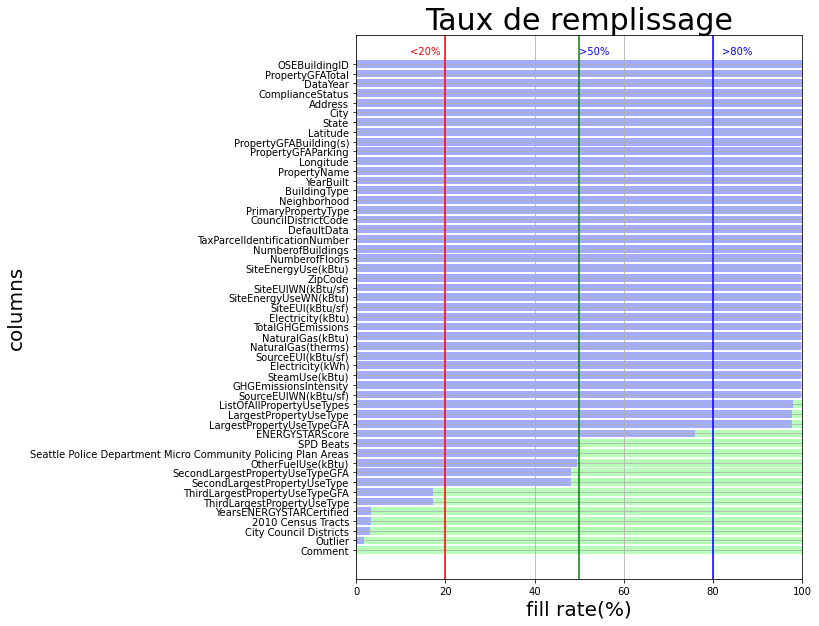

In [39]:
TraceValeurMissing(dataElec)

In [40]:
Missing(dataElec).sort_values(ascending=False)
#nous voyons que nous avons des colonnes ayant comme pourcentage de valeur
#manquantes > à 95 % 

Comment                                                          99.806432
Outlier                                                          98.272781
City Council Districts                                           96.828469
2010 Census Tracts                                               96.664681
YearsENERGYSTARCertified                                         96.590232
ThirdLargestPropertyUseTypeGFA                                   82.787373
ThirdLargestPropertyUseType                                      82.787373
SecondLargestPropertyUseType                                     51.786778
SecondLargestPropertyUseTypeGFA                                  51.786778
OtherFuelUse(kBtu)                                               50.416915
SPD Beats                                                        50.297796
Seattle Police Department Micro Community Policing Plan Areas    50.297796
ENERGYSTARScore                                                  24.166170
LargestPropertyUseType   

In [41]:
dataElec.shape

(6716, 51)

## Suppression des colonnes >95

In [42]:
dataElec=Suppression(dataElec,95)
dataElec.shape
#on passe de 51 colonnes à 46 colonnes
#nous avons 5 colonnes ayant comme % de valeurs manquantes > 95

(6716, 46)

les colonnes vides sont:




[]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
number of missing values,0,0,0,0,0,2,0,0,0,8,8,0,0,0,136,156,156,3478,3478,5560,5560,1623,17,16,19,19,15,16,19,19,19,19,19,3386,1,0,3378,3378,0,0,0,16,0,0,19,19
number of values,6716,6716,6716,6716,6716,6714,6716,6716,6716,6708,6708,6716,6716,6716,6580,6560,6560,3238,3238,1156,1156,5093,6699,6700,6697,6697,6701,6700,6697,6697,6697,6697,6697,3330,6715,6716,3338,3338,6716,6716,6716,6700,6716,6716,6697,6697
fill_rate,1.0,1.0,1.0,1.0,1.0,0.999702,1.0,1.0,1.0,0.998809,0.998809,1.0,1.0,1.0,0.97975,0.976772,0.976772,0.482132,0.482132,0.172126,0.172126,0.758338,0.997469,0.997618,0.997171,0.997171,0.997767,0.997618,0.997171,0.997171,0.997171,0.997171,0.997171,0.495831,0.999851,1.0,0.497022,0.497022,1.0,1.0,1.0,0.997618,1.0,1.0,0.997171,0.997171


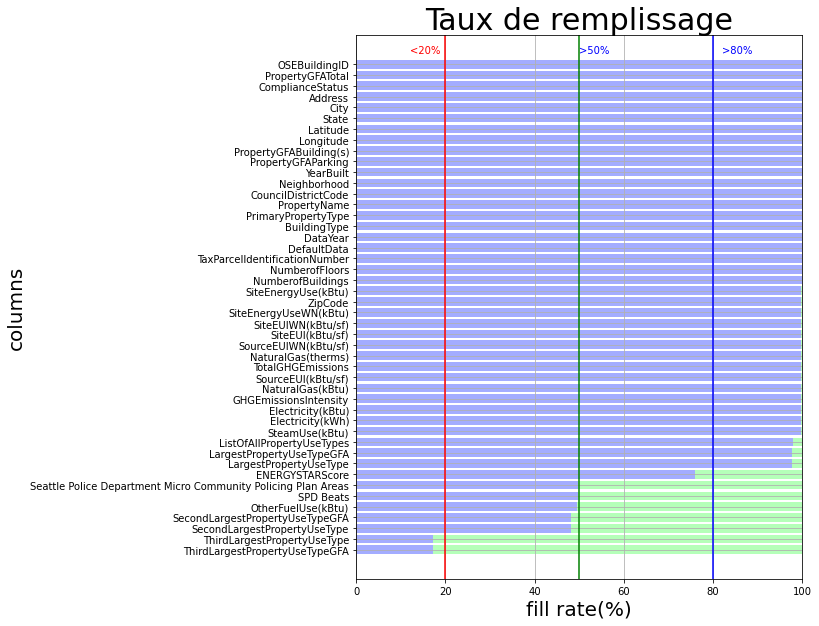

In [43]:
TraceValeurMissing(dataElec)

# Nettoyage des qualitatives

In [44]:
dataElec.select_dtypes('object').columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'DefaultData', 'ComplianceStatus', 'Address', 'City', 'State'],
      dtype='object')

In [45]:
dataElec.BuildingType.unique()
#cette colonne semble etre correcte pas de modalites 
#qui se sont ecrits de plusieurs facons 


array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [46]:
dataElec['BuildingType'].value_counts().values

array([2921, 2047, 1134,  217,  197,  153,   46,    1], dtype=int64)

In [47]:
df=pd.DataFrame({'Modalite':dataElec['BuildingType'].value_counts().index,'NMbre': dataElec['BuildingType'].value_counts().values})

<AxesSubplot:xlabel='NMbre', ylabel='Modalite'>

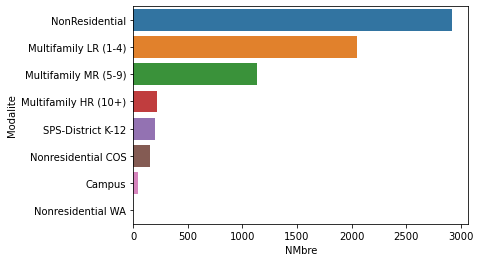

In [48]:
sns.barplot(y='Modalite',x='NMbre',data=df.sort_values('NMbre',ascending=False))

In [49]:
dataElec['BuildingType']=dataElec['BuildingType'].replace('Nonresidential COS', 'NonResidential')
dataElec['BuildingType']=dataElec['BuildingType'].replace('Nonresidential WA', 'NonResidential')
dataElec['BuildingType']=dataElec['BuildingType'].replace('SPS-District K-12', 'NonResidential')
dataElec['BuildingType']=dataElec['BuildingType'].replace('Campus', 'NonResidential')
dataElec['BuildingType']=dataElec['BuildingType'].replace('Multifamily MR (5-9)', 'Residential')
dataElec['BuildingType']=dataElec['BuildingType'].replace('Multifamily LR (1-4)', 'Residential')
dataElec['BuildingType']=dataElec['BuildingType'].replace('Multifamily HR (10+)', 'Residential')

In [50]:
dataElec.BuildingType.unique()

array(['NonResidential', 'Residential'], dtype=object)

<AxesSubplot:xlabel='BuildingType', ylabel='count'>

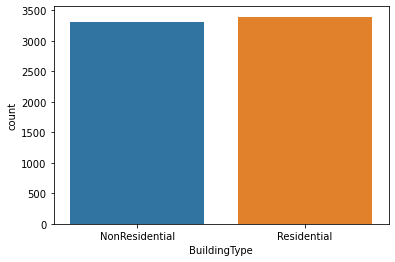

In [51]:
sns.countplot(x='BuildingType',data=dataElec)

## Nettoyage primary property

In [52]:
dataElec['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [53]:
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Distribution Center\n', 'Distribution Center')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Self-Storage Facility\n', 'Self-Storage Facility')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Mid-Rise Multifamily', 'Multifamily')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Low-Rise Multifamily', 'Multifamily')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('High-Rise Multifamily', 'Multifamily')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('K-12 School', 'School')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('SPS-District K-12', 'School')

dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Small- and Mid-Sized Office', 'Office')

dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Large Office', 'Office')

dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Retail Store', 'Store')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Supermarket / Grocery Store', 'Store')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Residence Hall/Dormitory', 'Residence')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Residence Hall', 'Residence')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('College/University', 'University')

dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Senior Care Community', 'Medical')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Medical Office', 'Medical')
dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Hospital', 'Medical')

dataElec['PrimaryPropertyType']=dataElec['PrimaryPropertyType'].replace('Non-Refrigerated Warehouse', 'Warehouse')
dataElec.PrimaryPropertyType.unique()


array(['Hotel', 'Other', 'Multifamily', 'Mixed Use Property', 'School',
       'University', 'Office', 'Self-Storage Facility',
       'Distribution Center', 'Store', 'Medical', 'Residence',
       'Warehouse', 'Worship Facility', 'Supermarket/Grocery Store',
       'Laboratory', 'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [54]:
i=(dataElec['OSEBuildingID']==517) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
368,Other,2015
365,Store,2016


In [55]:
dataElec.loc[(dataElec['OSEBuildingID']==517 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Store'

In [56]:
j=(dataElec['OSEBuildingID']==517) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Store')


In [57]:
i=(dataElec['OSEBuildingID']==46) 
dataElec[['PrimaryPropertyType','DataYear']][i]


,PrimaryPropertyType,DataYear
35,Distribution Center,2015
36,Warehouse,2016


In [58]:
dataElec.loc[(dataElec['OSEBuildingID']==46 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Warehouse'

In [59]:
j=(dataElec['OSEBuildingID']==46) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Distribution Center','Warehouse')

In [60]:
i=(dataElec['OSEBuildingID']==513) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
364,Office,2015
361,Other,2016


In [61]:
dataElec.loc[(dataElec['OSEBuildingID']==513 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Other'

In [62]:
j=(dataElec['OSEBuildingID']==513) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Other')

In [63]:
i=(dataElec['OSEBuildingID']==513) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
364,Other,2015
361,Other,2016


In [64]:
i=(dataElec['OSEBuildingID']==528) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
379,Other,2015
376,Store,2016


In [65]:
dataElec.loc[(dataElec['OSEBuildingID']==528 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Store'

In [66]:
j=(dataElec['OSEBuildingID']==528) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Store')

In [67]:
i=(dataElec['OSEBuildingID']==569) 
dataElec[['PrimaryPropertyType','DataYear']][i]


,PrimaryPropertyType,DataYear
414,Office,2015
410,Mixed Use Property,2016


In [68]:
dataElec.loc[(dataElec['OSEBuildingID']==569 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Mixed Use Property'

In [69]:
j=(dataElec['OSEBuildingID']==569) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Mixed Use Property')

In [70]:
i=(dataElec['OSEBuildingID']==569) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
414,Mixed Use Property,2015
410,Mixed Use Property,2016


In [71]:
i=(dataElec['OSEBuildingID']==743) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
553,Other,2015
550,Laboratory,2016


In [72]:
dataElec.loc[(dataElec['OSEBuildingID']==743 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Laboratory'

In [73]:
j=(dataElec['OSEBuildingID']==743) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

In [74]:
i=(dataElec['OSEBuildingID']==796) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
598,Store,2015
594,Office,2016


In [75]:
dataElec.loc[(dataElec['OSEBuildingID']==796 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Office'

In [76]:
j=(dataElec['OSEBuildingID']==796) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Store','Office')

In [77]:
i=(dataElec['OSEBuildingID']==829) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
622,Office,2015
619,Other,2016


In [78]:
dataElec.loc[(dataElec['OSEBuildingID']==829 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Other'

In [79]:
j=(dataElec['OSEBuildingID']==829) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Other')

In [80]:
i=(dataElec['OSEBuildingID']==832) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
625,Office,2015
622,Other,2016


In [81]:
dataElec.loc[(dataElec['OSEBuildingID']==832 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Other'

In [82]:
j=(dataElec['OSEBuildingID']==832) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Other')

In [83]:
i=(dataElec['OSEBuildingID']==1280) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
645,Office,2015
640,Mixed Use Property,2016


In [84]:
dataElec.loc[(dataElec['OSEBuildingID']==1280 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Mixed Use Property'

In [85]:
j=(dataElec['OSEBuildingID']==1280) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Mixed Use Property')

In [86]:
i=(dataElec['OSEBuildingID']==19445) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
649,Mixed Use Property,2015
644,Multifamily,2016


In [87]:
dataElec.loc[(dataElec['OSEBuildingID']==19445 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Multifamily'

In [88]:
j=(dataElec['OSEBuildingID']==19445) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Multifamily')

In [89]:
i=(dataElec['OSEBuildingID']==19654) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
701,Medical,2015
697,Laboratory,2016


In [90]:
dataElec.loc[(dataElec['OSEBuildingID']==19654 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Laboratory'

In [91]:
j=(dataElec['OSEBuildingID']==19654) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Medical','Laboratory')

In [92]:
i=(dataElec['OSEBuildingID']==19900) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
819,Other,2015
809,Laboratory,2016


In [93]:
dataElec.loc[(dataElec['OSEBuildingID']==19900 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Laboratory'

In [94]:
j=(dataElec['OSEBuildingID']==19900) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

In [95]:
i=(dataElec['OSEBuildingID']==40034) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3173,Medical,2015
3132,Office,2016


In [96]:
dataElec.loc[(dataElec['OSEBuildingID']==40034 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Office'

In [97]:
j=(dataElec['OSEBuildingID']==40034) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Medical','Office')

In [98]:
i=(dataElec['OSEBuildingID']==40348) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3175,Store,2015
3134,Mixed Use Property,2016


In [99]:
dataElec.loc[(dataElec['OSEBuildingID']==40348 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Mixed Use Property'

In [100]:
j=(dataElec['OSEBuildingID']==40348) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Store','Mixed Use Property')

In [101]:
i=(dataElec['OSEBuildingID']==45927) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3197,Other,2015
3156,Laboratory,2016


In [102]:
dataElec.loc[(dataElec['OSEBuildingID']==45927 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Laboratory'

In [103]:
j=(dataElec['OSEBuildingID']==45927) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

In [104]:
i=(dataElec['OSEBuildingID']==49783) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3245,Other,2015
3205,Laboratory,2016


In [105]:
j=(dataElec['OSEBuildingID']==49783) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

<ipython-input-105-409c92202cd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [106]:
i=(dataElec['OSEBuildingID']==21549) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1347,Other,2015
1337,Laboratory,2016


In [107]:
j=(dataElec['OSEBuildingID']==21549) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

<ipython-input-107-f9cf527a0e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [108]:
i=(dataElec['OSEBuildingID']==24825) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2240,Warehouse,2015
2216,Office,2016


In [109]:
j=(dataElec['OSEBuildingID']==24825) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Warehouse','Office')

<ipython-input-109-bb591195dba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Warehouse','Office')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [110]:
i=(dataElec['OSEBuildingID']==22163) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1527,Store,2015
1512,Office,2016


In [111]:
j=(dataElec['OSEBuildingID']==22163) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Store','Office')

<ipython-input-111-7b0d64b95327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Store','Office')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [112]:
i=(dataElec['OSEBuildingID']==23311) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1775,Other,2015
1754,Medical,2016


In [113]:
j=(dataElec['OSEBuildingID']==23311) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Medical')

<ipython-input-113-af0c8a9f8f21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Medical')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [114]:
i=(dataElec['OSEBuildingID']==318) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
198,Other,2015
198,Mixed Use Property,2016


In [115]:
j=(dataElec['OSEBuildingID']==318) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Mixed Use Property')

<ipython-input-115-6f76f2c94dca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Mixed Use Property')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [116]:
i=(dataElec['OSEBuildingID']==371) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
246,Office,2015
246,Mixed Use Property,2016


In [117]:
j=(dataElec['OSEBuildingID']==371) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Mixed Use Property')

<ipython-input-117-258ee0de89bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Mixed Use Property')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
i=(dataElec['OSEBuildingID']==469) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
334,Other,2015
333,Laboratory,2016


In [119]:
j=(dataElec['OSEBuildingID']==469) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

<ipython-input-119-400e2c514b91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [120]:
i=(dataElec['OSEBuildingID']==470) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
335,Other,2015
334,Laboratory,2016


In [121]:
j=(dataElec['OSEBuildingID']==470) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

<ipython-input-121-0e8f4cf6ddb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [122]:
i=(dataElec['OSEBuildingID']==624) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
465,Warehouse,2015
463,Other,2016


In [123]:
j=(dataElec['OSEBuildingID']==624) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Warehouse','Other')

<ipython-input-123-7daa83100ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Warehouse','Other')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [124]:
i=(dataElec['OSEBuildingID']==716) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
532,Other,2015
529,Store,2016


In [125]:
j=(dataElec['OSEBuildingID']==716) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Store')

<ipython-input-125-aca87e9a6d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
i=(dataElec['OSEBuildingID']==49924) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3300,University,2015
3259,Office,2016


In [127]:
j=(dataElec['OSEBuildingID']==49924) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('University','Office')

<ipython-input-127-c091c0e431e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('University','Office')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [128]:
i=(dataElec['OSEBuildingID']==26596) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2716,Mixed Use Property,2015
2684,Office,2016


In [129]:
j=(dataElec['OSEBuildingID']==26596) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Office')

<ipython-input-129-6401f5325763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Office')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [130]:
i=(dataElec['OSEBuildingID']==28086) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3119,Other,2015
3077,Laboratory,2016


In [131]:
j=(dataElec['OSEBuildingID']==28086) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')

<ipython-input-131-a4e27fe04631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Laboratory')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [132]:
i=(dataElec['OSEBuildingID']==32429) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3146,Mixed Use Property,2015
3105,Restaurant,2016


In [133]:
j=(dataElec['OSEBuildingID']==32429) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Restaurant')

<ipython-input-133-53bab9944511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Restaurant')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [134]:
i=(dataElec['OSEBuildingID']==49946) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3309,Supermarket/Grocery Store,2015
3268,Store,2016


In [135]:
j=(dataElec['OSEBuildingID']==49946) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-135-74f5833fe491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [136]:
i=(dataElec['OSEBuildingID']==49775) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3238,Supermarket/Grocery Store,2015
3198,Store,2016


In [137]:
j=(dataElec['OSEBuildingID']==49775) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-137-ea5e3fd4aa51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [138]:
i=(dataElec['OSEBuildingID']==49687) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3201,Supermarket/Grocery Store,2015
3160,Store,2016


In [139]:
j=(dataElec['OSEBuildingID']==49687) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-139-8ef940cff1a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [140]:
i=(dataElec['OSEBuildingID']==41928) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3182,Supermarket/Grocery Store,2015
3141,Store,2016


In [141]:
j=(dataElec['OSEBuildingID']==41928) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-141-ccaf4f50b435>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [142]:
i=(dataElec['OSEBuildingID']==34908) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3157,Supermarket/Grocery Store,2015
3116,Store,2016


In [143]:
j=(dataElec['OSEBuildingID']==34908) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-143-be2ec16b740a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [144]:
i=(dataElec['OSEBuildingID']==34891) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3156,Supermarket/Grocery Store,2015
3115,Store,2016


In [145]:
j=(dataElec['OSEBuildingID']==34891) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-145-5fc42dc26ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [146]:
i=(dataElec['OSEBuildingID']==27821) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3034,Supermarket/Grocery Store,2015
2996,Store,2016


In [147]:
j=(dataElec['OSEBuildingID']==27821) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-147-35664a3d6d11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [148]:
i=(dataElec['OSEBuildingID']==27378) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2931,Supermarket/Grocery Store,2015
2896,Store,2016


In [149]:
j=(dataElec['OSEBuildingID']==27378) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-149-eb0f62e00c1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [150]:
i=(dataElec['OSEBuildingID']==27162) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2873,Supermarket/Grocery Store,2015
2839,Store,2016


In [151]:
j=(dataElec['OSEBuildingID']==27162) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-151-f63e12dae1b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [152]:
i=(dataElec['OSEBuildingID']==26986) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2829,Supermarket/Grocery Store,2015
2795,Store,2016


In [153]:
j=(dataElec['OSEBuildingID']==26986) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-153-ed8d33d34c04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [154]:
i=(dataElec['OSEBuildingID']==26532) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2703,Store,2015
2670,Mixed Use Property,2016


In [155]:
j=(dataElec['OSEBuildingID']==26532) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Store','Mixed Use Property')

<ipython-input-155-65a79d2fd0b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Store','Mixed Use Property')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [156]:
i=(dataElec['OSEBuildingID']==26473) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2689,Supermarket/Grocery Store,2015
2656,Store,2016


In [157]:
j=(dataElec['OSEBuildingID']==26473) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-157-fda027b48c17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [158]:
i=(dataElec['OSEBuildingID']==26529) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2701,Supermarket/Grocery Store,2015
2668,Store,2016


In [159]:
j=(dataElec['OSEBuildingID']==26529) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-159-6e0bc6d21c3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
i=(dataElec['OSEBuildingID']==25914) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2547,Supermarket/Grocery Store,2015
2514,Store,2016


In [161]:
j=(dataElec['OSEBuildingID']==25914) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-161-6f41a4e4d38b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [162]:
i=(dataElec['OSEBuildingID']==24895) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2259,Supermarket/Grocery Store,2015
2235,Store,2016


In [163]:
j=(dataElec['OSEBuildingID']==24895) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-163-4a7dd8c34ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [164]:
i=(dataElec['OSEBuildingID']==24514) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2138,Supermarket/Grocery Store,2015
2115,Store,2016


In [165]:
j=(dataElec['OSEBuildingID']==24514) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-165-b3fb953c6eb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [166]:
i=(dataElec['OSEBuildingID']==24493) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2132,Supermarket/Grocery Store,2015
2109,Store,2016


In [167]:
j=(dataElec['OSEBuildingID']==24493) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-167-dc3701fe55f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [168]:
i=(dataElec['OSEBuildingID']==24479) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2124,Supermarket/Grocery Store,2015
2101,Store,2016


In [169]:
j=(dataElec['OSEBuildingID']==24479) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-169-658490ec11b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [170]:
i=(dataElec['OSEBuildingID']==23716) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1912,Supermarket/Grocery Store,2015
1893,Store,2016


In [171]:
j=(dataElec['OSEBuildingID']==23716) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-171-65ce2c4fcd53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [172]:
i=(dataElec['OSEBuildingID']==23228) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1746,Supermarket/Grocery Store,2015
1726,Store,2016


In [173]:
j=(dataElec['OSEBuildingID']==23228) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-173-3e76397f911e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [174]:
i=(dataElec['OSEBuildingID']==23098) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1697,Supermarket/Grocery Store,2015
1678,Store,2016


In [175]:
j=(dataElec['OSEBuildingID']==23098) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-175-f0c023b2b542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [176]:
i=(dataElec['OSEBuildingID']==22479) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1581,Supermarket/Grocery Store,2015
1563,Store,2016


In [177]:
j=(dataElec['OSEBuildingID']==22479) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-177-9593a9b67b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [178]:
i=(dataElec['OSEBuildingID']==22230) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1535,Supermarket/Grocery Store,2015
1519,Store,2016


In [179]:
j=(dataElec['OSEBuildingID']==22230) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-179-f30517f20f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [180]:
i=(dataElec['OSEBuildingID']==22240) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1538,Supermarket/Grocery Store,2015
1522,Store,2016


In [181]:
j=(dataElec['OSEBuildingID']==22240) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-181-0d875e099830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [182]:
i=(dataElec['OSEBuildingID']==22142) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1524,Supermarket/Grocery Store,2015
1509,Store,2016


In [183]:
j=(dataElec['OSEBuildingID']==22142) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-183-32183ee68da6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [184]:
i=(dataElec['OSEBuildingID']==21921) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1490,Supermarket/Grocery Store,2015
1476,Store,2016


In [185]:
#df.loc[df['A'] > 2, 'B'] = new_val

In [186]:
j=(dataElec['OSEBuildingID']==21921) & (dataElec['DataYear']==2015)
#dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

In [187]:
dataElec.loc[(dataElec['OSEBuildingID']==21921 ) & (dataElec['DataYear']==2015),'PrimaryPropertyType']='Store'

In [188]:
i=(dataElec['OSEBuildingID']==20565) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1045,Supermarket/Grocery Store,2015
1033,Store,2016


In [189]:
j=(dataElec['OSEBuildingID']==20565) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-189-19f5f9f5bf30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [190]:
i=(dataElec['OSEBuildingID']==20435) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
1003,Supermarket/Grocery Store,2015
990,Store,2016


In [191]:
j=(dataElec['OSEBuildingID']==20435) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-191-7a10f27dd985>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [192]:
i=(dataElec['OSEBuildingID']==867) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
643,Supermarket/Grocery Store,2015
638,Store,2016


In [193]:
j=(dataElec['OSEBuildingID']==867) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-193-807558e00124>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [194]:
i=(dataElec['OSEBuildingID']==802) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
604,Supermarket/Grocery Store,2015
600,Store,2016


In [195]:
j=(dataElec['OSEBuildingID']==802) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-195-8860365ec607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [196]:
i=(dataElec['OSEBuildingID']==607) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
449,Supermarket/Grocery Store,2015
447,Store,2016


In [197]:
j=(dataElec['OSEBuildingID']==607) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-197-6f7f3968a89c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [198]:
i=(dataElec['OSEBuildingID']==557) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
403,Supermarket/Grocery Store,2015
401,Store,2016


In [199]:
j=(dataElec['OSEBuildingID']==557) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-199-e2b68d386caf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [200]:
i=(dataElec['OSEBuildingID']==558) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
404,Supermarket/Grocery Store,2015
402,Store,2016


In [201]:
j=(dataElec['OSEBuildingID']==558) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-201-4b28711555e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [202]:
i=(dataElec['OSEBuildingID']==519) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
370,Supermarket/Grocery Store,2015
367,Store,2016


In [203]:
j=(dataElec['OSEBuildingID']==519) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-203-10e1dfab3af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [204]:
i=(dataElec['OSEBuildingID']==503) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
360,Supermarket/Grocery Store,2015
357,Store,2016


In [205]:
j=(dataElec['OSEBuildingID']==503) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-205-fc19fdd64c6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [206]:
i=(dataElec['OSEBuildingID']==381) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
254,Supermarket/Grocery Store,2015
254,Store,2016


In [207]:
j=(dataElec['OSEBuildingID']==381) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-207-4da72ee2f83f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [208]:
i=(dataElec['OSEBuildingID']==35932) #on a aucun élement sur cet identifiant
dataElec=dataElec.drop(index=dataElec[i].index)

In [209]:
i=(dataElec['OSEBuildingID']==649) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
483,Office,2015
481,Office,2016


In [210]:
j=(dataElec['OSEBuildingID']==649) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Office')

<ipython-input-210-64f91e48f990>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Office')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [211]:
i=(dataElec['OSEBuildingID']==25464) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2412,Office,2015
2384,Office,2016


In [212]:
j=(dataElec['OSEBuildingID']==25464) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Office')

<ipython-input-212-7e3f54430d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Office','Office')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [213]:
i=(dataElec['OSEBuildingID']==25563) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
2440,Warehouse,2015
2412,Warehouse,2016


In [214]:
j=(dataElec['OSEBuildingID']==25563) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Warehouse','Warehouse')

<ipython-input-214-c120bb972314>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Warehouse','Warehouse')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [215]:
i=(dataElec['OSEBuildingID']==29170) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3129,Mixed Use Property,2015
3087,Mixed Use Property,2016


In [216]:
j=(dataElec['OSEBuildingID']==29170) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Mixed Use Property')

<ipython-input-216-eede530a86e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Mixed Use Property','Mixed Use Property')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [217]:
i=(dataElec['OSEBuildingID']==35392) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3159,Supermarket/Grocery Store,2015
3118,Store,2016


In [218]:
j=(dataElec['OSEBuildingID']==35392) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')

<ipython-input-218-2451c0f9ec49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Supermarket/Grocery Store','Store')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [219]:
i=(dataElec['OSEBuildingID']==49911) 
dataElec[['PrimaryPropertyType','DataYear']][i]

,PrimaryPropertyType,DataYear
3294,Other,2015
3253,Other,2016


In [220]:
j=(dataElec['OSEBuildingID']==49911) & (dataElec['DataYear']==2015)
dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Other')

<ipython-input-220-103785d110d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PrimaryPropertyType'][j]= dataElec['PrimaryPropertyType'][j].replace('Other','Other')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Nettoyage du nom et neighborhood

In [221]:
i=(dataElec['OSEBuildingID']==649) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
483,649,2015,NonResidential,Office,IMMIGRATION SERVICE BUILDING,7669800045,2,GREATER DUWAMISH,1930,1.0,4.0,76624,0,76624,Office,Office,76624.0,NaN,NaN,NaN,NaN,91.0,34.700000,43.400000,103.000000,130.2,2660396.0,3323813.00,0.0,714712.0000,2438699.0,2218.0,221798.0,0.0,False,Compliant,27.0,22.0,815 AIRPORT WAY S,SEATTLE,WA,98134.0,47.595117,-122.327086,28.78,0.24
481,649,2016,NonResidential,Office,INScape,7669800045,3,EAST,1930,0.0,4.0,76624,0,76624,Office,Office,76624.0,NaN,NaN,NaN,NaN,91.0,36.200001,41.299999,105.300003,121.5,2773647.5,3166841.75,0.0,723489.8125,2468547.0,3051.0,305100.0,NaN,False,Compliant,NaN,NaN,815 Seattle Blvd S.,Seattle,WA,98134.0,47.595348,-122.327269,33.41,0.44


In [222]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==649) & (dataElec['DataYear']==2015)
dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('GREATER DUWAMISH','EAST')

<ipython-input-222-a5833a1cc971>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('GREATER DUWAMISH','EAST')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [223]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==649) & (dataElec['DataYear']==2015)
dataElec['PropertyName'][j]= dataElec['PropertyName'][j].replace('IMMIGRATION SERVICE BUILDING','INSCAPE')

<ipython-input-223-209d34f6aa6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PropertyName'][j]= dataElec['PropertyName'][j].replace('IMMIGRATION SERVICE BUILDING','INSCAPE')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [224]:
i=(dataElec['OSEBuildingID']==25464) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
2412,25464,2015,NonResidential,Office,WATERWORKS OFFICE & MARINA,4088803975,7,LAKE UNION,1965,1.0,4.0,30840,0,30840,"Office, Restaurant",Office,29255.0,Restaurant,1180.0,NaN,NaN,35.0,112.400000,130.700000,238.300000,257.500000,3420710.0,3976355.00,0.0,513307.0,1751478.0,16693.00000,1669305.0,0.0,False,Compliant,50.0,7.0,1818 WESTLAKE AVE N,SEATTLE,WA,98109.0,47.635372,-122.339778,100.87,3.03
2384,25464,2016,NonResidential,Office,Waterworks Offices + Marina,4088803975,7,MAGNOLIA / QUEEN ANNE,1965,1.0,4.0,30840,0,30840,"Office, Restaurant",Office,29255.0,Restaurant,1180.0,NaN,NaN,30.0,116.400002,126.199997,251.600006,261.899994,3542708.5,3840161.75,0.0,552255.0,1884294.0,16584.14063,1658414.0,NaN,False,Compliant,NaN,NaN,1818 Westlake Ave N,Seattle,WA,98109.0,47.635750,-122.338950,101.21,3.28


In [225]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==25464) & (dataElec['DataYear']==2015)
dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('LAKE UNION','MAGNOLIA / QUEEN ANNE')

<ipython-input-225-505e0b3b85a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('LAKE UNION','MAGNOLIA / QUEEN ANNE')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [226]:
i=(dataElec['OSEBuildingID']==25563) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
2440,25563,2015,NonResidential,Warehouse,NAUTICAL LANDING,4088804350,7,LAKE UNION,1968,1.0,2.0,29498,0,29498,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,19749.0,Office,9148.0,NaN,NaN,NaN,119.600000,119.6,340.100000,340.100000,3456208.0,3456208.0,0.0,869327.000,2966265.0,4901.00000,490066.0,0.0,False,Compliant,50.0,7.0,2500 WESTLAKE AVE N,SEATTLE,WA,98109.0,47.642577,-122.34251,46.71,1.15
2412,25563,2016,NonResidential,Warehouse,Nautical Landing,4088804350,7,MAGNOLIA / QUEEN ANNE,1968,1.0,2.0,29498,0,29498,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,19749.0,Office,9148.0,NaN,NaN,NaN,130.399994,136.0,372.299988,378.100006,3768900.5,3930355.5,0.0,953599.875,3253683.0,5152.17041,515217.0,NaN,False,Compliant,NaN,NaN,2500 Westlake Ave N,Seattle,WA,98109.0,47.643060,-122.34219,50.05,1.70


In [227]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==25563) & (dataElec['DataYear']==2015)
dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('LAKE UNION','MAGNOLIA / QUEEN ANNE')

<ipython-input-227-6d7dfaea36e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('LAKE UNION','MAGNOLIA / QUEEN ANNE')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [228]:
i=(dataElec['OSEBuildingID']==29170) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3129,29170,2015,NonResidential,Mixed Use Property,CHIEF SEATTLE CLUB/MONTEREY LOFTS,1562700010,2,DOWNTOWN,1900,1.0,3.0,22168,0,22168,"Multifamily Housing, Other - Entertainment/Pub...",Multifamily Housing,11084.0,Other - Entertainment/Public Assembly,11084.0,NaN,NaN,NaN,76.2,85.100000,167.700000,177.100000,1689631.00,1887572.00,0.0,272546.0,929965.0,7597.000000,759705.0,0.0,False,Compliant,49.0,20.0,410 2ND AVE,SEATTLE,WA,98104.0,47.599016,-122.331508,46.83,1.93
3087,29170,2016,NonResidential,Mixed Use Property,Chief Seattle Club/Monterey Lofts,1562700010,3,EAST,1900,1.0,3.0,22168,0,22168,"Multifamily Housing, Other - Entertainment/Pub...",Multifamily Housing,11084.0,Other - Entertainment/Public Assembly,11084.0,NaN,NaN,NaN,80.5,85.900002,177.100006,182.899994,1784385.25,1904848.25,0.0,287947.0,982475.0,8019.099609,801910.0,NaN,False,Compliant,NaN,NaN,410 2nd Avenue Extenstion South,Seattle,WA,98104.0,47.599016,-122.331508,49.44,2.23


In [229]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==29170) & (dataElec['DataYear']==2015)
dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('DOWNTOWN','EAST')

<ipython-input-229-a273932673f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('DOWNTOWN','EAST')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [230]:
i=(dataElec['OSEBuildingID']==35392) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3159,35392,2015,NonResidential,Store,QFC at 500 MERCER,4458720010,7,MAGNOLIA / QUEEN ANNE,2006,1.0,4.0,45980,0,45980,Supermarket/Grocery Store,Supermarket/Grocery Store,45980.0,NaN,NaN,NaN,NaN,81.0,182.300000,195.7,430.500000,440.100000,8381744.0,9000402.0,0.0,1541778.00,5260765.0,31212.00000,3121197.0,0.0,False,Compliant,56.0,40.0,500 MERCER ST,SEATTLE,WA,98109.0,47.625008,-122.34687,202.44,3.91
3118,35392,2016,NonResidential,Store,70500881 -- Uptown,4458720010,7,MAGNOLIA / QUEEN ANNE,2006,1.0,4.0,45980,0,45980,Supermarket/Grocery Store,Supermarket/Grocery Store,45980.0,NaN,NaN,NaN,NaN,79.0,180.600006,186.5,433.700012,439.799988,8305255.0,8573323.0,0.0,1573632.75,5369235.0,29360.19727,2936020.0,NaN,False,Compliant,NaN,NaN,500 Mercer Street,Seattle,WA,98109.0,47.624730,-122.34727,193.36,4.21


In [231]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==35392) & (dataElec['DataYear']==2015)
dataElec['PropertyName'][j]= dataElec['PropertyName'][j].replace('QFC AT 500 MERCER','70500881 -- UPTOWN')

<ipython-input-231-3bc4d07b2b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PropertyName'][j]= dataElec['PropertyName'][j].replace('QFC AT 500 MERCER','70500881 -- UPTOWN')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [232]:
i=(dataElec['OSEBuildingID']==49911) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3294,49911,2015,NonResidential,Other,EDUCARE,2895800030,1,SOUTHWEST,2010,1.0,2.0,44162,0,44162,"Parking, Pre-school/Daycare",Pre-school/Daycare,44162.0,Parking,15761.0,NaN,NaN,NaN,28.6,33.9,65.900000,76.100000,1260902.000,1497532.00,0.0,222377.0000,758782.0,5022.0,502152.0,0.0,False,Compliant,NaN,NaN,625 SW 100TH ST,SEATTLE,WA,98146.0,47.513793,-122.343208,31.96,0.65
3253,49911,2016,NonResidential,Other,Educare Early Learning Center,2895800030,1,DELRIDGE,2010,1.0,2.0,44162,0,44162,"Parking, Pre-school/Daycare",Pre-school/Daycare,44162.0,Parking,15761.0,NaN,NaN,NaN,35.0,38.0,81.900002,87.099998,1546484.875,1679541.25,0.0,279494.4063,953635.0,5928.5,592850.0,NaN,False,Compliant,NaN,NaN,625 S.W. 100th St.,Seattle,WA,98146.0,47.513770,-122.343280,38.13,0.86


In [233]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==49911) & (dataElec['DataYear']==2015)
dataElec['PropertyName'][j]= dataElec['PropertyName'][j].replace('EDUCARE','EDUCARE EARLY LEARNING CENTER')

<ipython-input-233-d2d8c68dcb31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['PropertyName'][j]= dataElec['PropertyName'][j].replace('EDUCARE','EDUCARE EARLY LEARNING CENTER')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [234]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==49911) & (dataElec['DataYear']==2015)
dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('SOUTHWEST','DELRIDGE')

<ipython-input-234-0052531a98ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('SOUTHWEST','DELRIDGE')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [235]:
i=(dataElec['OSEBuildingID']==49911) 
dataElec[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3294,49911,2015,NonResidential,Other,EDUCARE EARLY LEARNING CENTER,2895800030,1,DELRIDGE,2010,1.0,2.0,44162,0,44162,"Parking, Pre-school/Daycare",Pre-school/Daycare,44162.0,Parking,15761.0,NaN,NaN,NaN,28.6,33.9,65.900000,76.100000,1260902.000,1497532.00,0.0,222377.0000,758782.0,5022.0,502152.0,0.0,False,Compliant,NaN,NaN,625 SW 100TH ST,SEATTLE,WA,98146.0,47.513793,-122.343208,31.96,0.65
3253,49911,2016,NonResidential,Other,Educare Early Learning Center,2895800030,1,DELRIDGE,2010,1.0,2.0,44162,0,44162,"Parking, Pre-school/Daycare",Pre-school/Daycare,44162.0,Parking,15761.0,NaN,NaN,NaN,35.0,38.0,81.900002,87.099998,1546484.875,1679541.25,0.0,279494.4063,953635.0,5928.5,592850.0,NaN,False,Compliant,NaN,NaN,625 S.W. 100th St.,Seattle,WA,98146.0,47.513770,-122.343280,38.13,0.86


In [236]:
#nous voyons que le voisinage en 2015 et 2016 sont diifférents nous allons 
#les changer 
j=(dataElec['OSEBuildingID']==29170) & (dataElec['DataYear']==2015)
dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('SOUTHWEST','DELRIDGE')

<ipython-input-236-2d45793fc1d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataElec['Neighborhood'][j]= dataElec['Neighborhood'][j].replace('SOUTHWEST','DELRIDGE')
C:\Users\soule\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [237]:
dataElec['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [238]:
pd.set_option('display.max_row',6800) 
i=dataElec.PropertyName.duplicated()== True
dataElec.PropertyName[i].head(5)
#nous remarquons que certaines lignes sont ecrits en minuscule d'autres
#en majuscules 

393          NW CORPORATE PARK
631           SHURGARD STORAGE
633                 HOME DEPOT
688    PAPE' MATERIAL HANDLING
801        GRANGE OFFICE PLAZA
Name: PropertyName, dtype: object

In [239]:
dataElec.PropertyName=[e.upper() for e in dataElec.PropertyName.values]
dataElec.PropertyName.head(5)

0     MAYFLOWER PARK HOTEL
1          PARAMOUNT HOTEL
2             WESTIN HOTEL
3                HOTEL MAX
4    WARWICK SEATTLE HOTEL
Name: PropertyName, dtype: object

In [240]:
dataElec.PropertyName.unique().shape

(5773,)

In [241]:
dataElec.Neighborhood.unique()
#zone de voisisnage 
#les modalites qui donnent la meme information ne secrivent pas de la meme 
#facon on va tous passer en majuscule 

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [242]:
dataElec['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
dataElec['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
dataElec['Neighborhood'].replace('North', 'NORTH', inplace=True)
dataElec['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
dataElec['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
dataElec['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
dataElec.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

# Sélection non residentiels

In [243]:
dataElec.BuildingType.value_counts()

Residential       3398
NonResidential    3318
Name: BuildingType, dtype: int64

In [244]:
j=(dataElec['BuildingType']== 'NonResidential')  
sum(j)

3318

In [245]:
dataNR=dataElec[j] #data des non residentials

In [246]:
dataNR.shape

(3318, 46)

In [247]:
dataNR.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,False,Compliant,14.0,31.0,405 OLIVE WAY,SEATTLE,WA,98101.0,47.612190,-122.337997,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,False,Compliant,14.0,31.0,724 PINE ST,SEATTLE,WA,98101.0,47.613106,-122.333358,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,True,Compliant,56.0,31.0,1900 5TH AVE,SEATTLE,WA,98101.0,47.613349,-122.337699,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,False,Compliant,56.0,31.0,620 STEWART ST,SEATTLE,WA,98101.0,47.614216,-122.336609,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,False,Compliant,56.0,31.0,401 LENORA ST,SEATTLE,WA,98121.0,47.613754,-122.340924,507.70,4.02


## Etude des Nan

In [248]:
Missing(dataNR).sort_values(ascending=False)
#nous allons travailler sur des colonnes assez remplis 
#les colonnes étant remplis à moitié seront supprimés 
#les seuls pourcentages de valeurs manquantes assez élevés sont 
#ThirdLargestPropertyUseType                                      79.385172
#ThirdLargestPropertyUseTypeGFA    avec 79.38
#SecondLargestPropertyUseType                                     49.758891
#SecondLargestPropertyUseTypeGFA  avec 50 
#Seattle Police Department Micro Community Policing Plan Areas    50.301386
#SPD Beats  50
#OtherFuelUse(kBtu)   50
#nous allons supprimer ces  7colonnes 

ThirdLargestPropertyUseTypeGFA                                   79.385172
ThirdLargestPropertyUseType                                      79.385172
OtherFuelUse(kBtu)                                               50.482218
SPD Beats                                                        50.301386
Seattle Police Department Micro Community Policing Plan Areas    50.301386
SecondLargestPropertyUseTypeGFA                                  49.758891
SecondLargestPropertyUseType                                     49.758891
ENERGYSTARScore                                                  33.363472
LargestPropertyUseTypeGFA                                         2.139843
LargestPropertyUseType                                            2.139843
ListOfAllPropertyUseTypes                                         1.898734
ZipCode                                                           0.482218
SiteEUIWN(kBtu/sf)                                                0.301386
SiteEUI(kBtu/sf)         

les colonnes vides sont:




[]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
number of missing values,0,0,0,0,0,1,0,0,0,2,8,0,0,0,63,71,71,1651,1651,2634,2634,1107,10,10,9,9,9,10,9,9,9,9,9,1675,1,0,1669,1669,0,0,0,16,0,0,9,9
number of values,3318,3318,3318,3318,3318,3317,3318,3318,3318,3316,3310,3318,3318,3318,3255,3247,3247,1667,1667,684,684,2211,3308,3308,3309,3309,3309,3308,3309,3309,3309,3309,3309,1643,3317,3318,1649,1649,3318,3318,3318,3302,3318,3318,3309,3309
fill_rate,1.0,1.0,1.0,1.0,1.0,0.999699,1.0,1.0,1.0,0.999397,0.997589,1.0,1.0,1.0,0.981013,0.978602,0.978602,0.502411,0.502411,0.206148,0.206148,0.666365,0.996986,0.996986,0.997288,0.997288,0.997288,0.996986,0.997288,0.997288,0.997288,0.997288,0.997288,0.495178,0.999699,1.0,0.496986,0.496986,1.0,1.0,1.0,0.995178,1.0,1.0,0.997288,0.997288


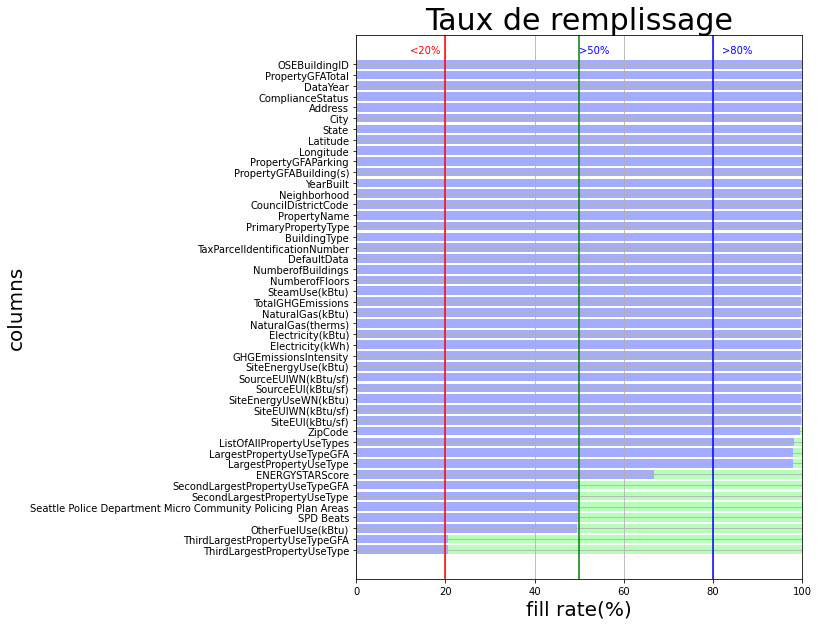

In [249]:
TraceValeurMissing(dataNR)

In [250]:
dataNR.shape

(3318, 46)

In [251]:
dataNR=dataNR.drop(columns=['ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'])
dataNR.shape

(3318, 44)

In [252]:
dataNR=dataNR.drop(columns=['SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType'])
dataNR.shape

(3318, 42)

In [253]:
dataNR=dataNR.drop(columns=['Seattle Police Department Micro Community Policing Plan Areas','SPD Beats','OtherFuelUse(kBtu)'])
dataNR.shape

(3318, 39)

In [254]:
d=Missing(dataNR)

In [255]:
d.index

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Address',
       'City', 'State', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [256]:
df=pd.DataFrame(d.index, columns=['Variables'])
df['Pourcentage de Valeurs manquantes']=d.values
df

,Variables,Pourcentage de Valeurs manquantes
0,OSEBuildingID,0.000000
1,DataYear,0.000000
2,BuildingType,0.000000
3,PrimaryPropertyType,0.000000
4,PropertyName,0.000000
5,TaxParcelIdentificationNumber,0.030139
6,CouncilDistrictCode,0.000000
7,Neighborhood,0.000000
8,YearBuilt,0.000000
9,NumberofBuildings,0.060277


les colonnes vides sont:




[]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
number of missing values,0,0,0,0,0,1,0,0,0,2,8,0,0,0,63,71,71,1107,10,10,9,9,9,10,9,9,9,9,9,1,0,0,0,0,16,0,0,9,9
number of values,3318,3318,3318,3318,3318,3317,3318,3318,3318,3316,3310,3318,3318,3318,3255,3247,3247,2211,3308,3308,3309,3309,3309,3308,3309,3309,3309,3309,3309,3317,3318,3318,3318,3318,3302,3318,3318,3309,3309
fill_rate,1.0,1.0,1.0,1.0,1.0,0.999699,1.0,1.0,1.0,0.999397,0.997589,1.0,1.0,1.0,0.981013,0.978602,0.978602,0.666365,0.996986,0.996986,0.997288,0.997288,0.997288,0.996986,0.997288,0.997288,0.997288,0.997288,0.997288,0.999699,1.0,1.0,1.0,1.0,0.995178,1.0,1.0,0.997288,0.997288


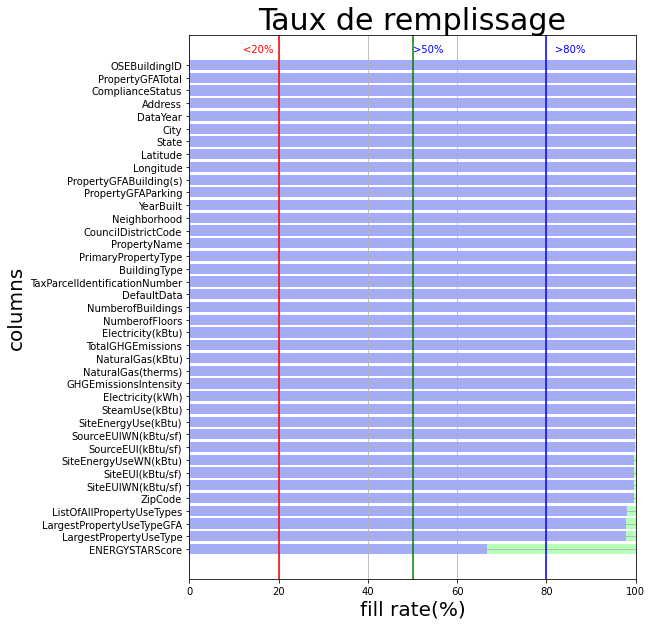

In [257]:
TraceValeurMissing(dataNR)

# Etude Corrélation  (sélection features)

<AxesSubplot:>

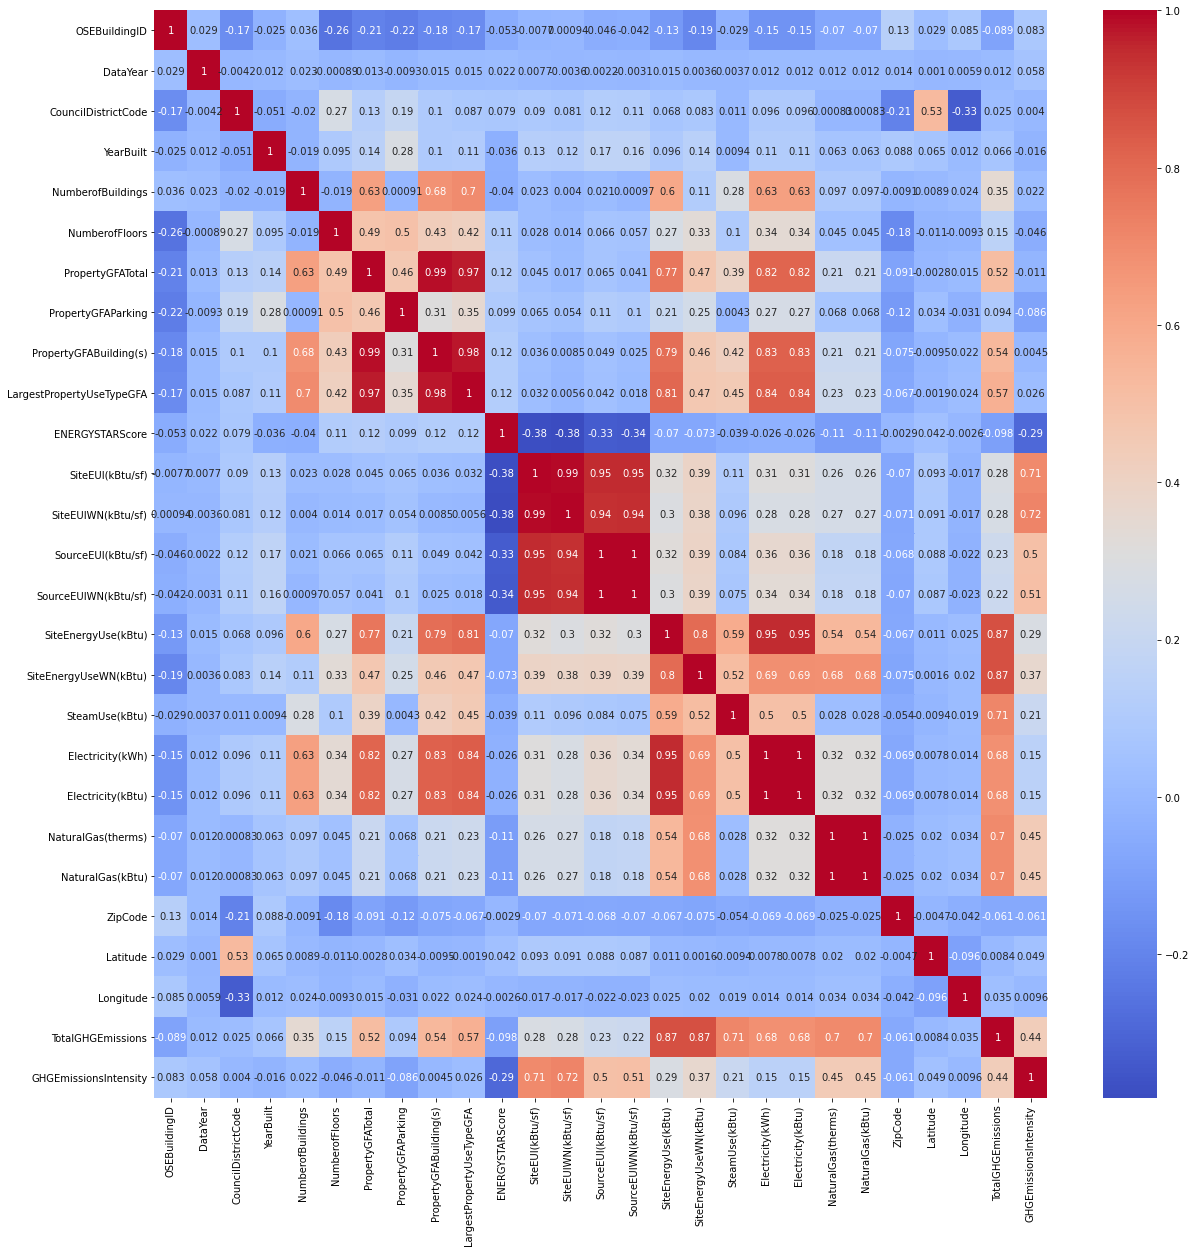

In [321]:
cor=dataNR.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [258]:
dataNR.select_dtypes(['float64','int64']).columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [259]:
dataNR.shape

(3318, 39)

In [260]:
dataNR=dataNR.drop(columns=['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)',\
                           'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',\
                           'SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)'])

In [261]:
dataNR.shape

(3318, 31)

# Nettoyage des quantitatives

In [262]:
dataNR.select_dtypes(['float64','int64']).columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [263]:
dataNR.NumberofBuildings.unique()
#nombre de batiments inclus dans le rapport 
#un etablissement avec 111 batiments bizarre ?
#on va regarder c'est lequel ?

array([  1.,   7.,  11.,  16.,   4.,   3.,  39.,   2.,  10.,   6.,   0.,
        27.,  14.,   9.,   5.,  nan,   8.,  23., 111.])

In [264]:
dataNR.NumberofBuildings.describe()

count    3316.000000
mean        1.117310
std         2.219845
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [265]:
dataNR[dataNR.NumberofBuildings==dataNR.NumberofBuildings.min()].head()
#on a 52 proprietes ayant un nombre de batiment =0 impossible 
#nous allons remplacer cette valeur par 1 car au moins 
#nous avons un batiment nombre de batiments ne peut pas etre =0

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
63,89,2016,NonResidential,Medical,POLYCLINIC NORTH && SOUTH,1978201270,3,EAST,1965,0.0,3.0,179014,0,Medical Office,Medical Office,48.0,93.300003,16701055.00,0.0,9886484.0,6814570.0,False,Compliant,1200 Harvard Ave,Seattle,WA,98122.0,47.61244,-122.32140,430.84,2.41
76,113,2016,NonResidential,Office,KCTS9,1988200705,7,MAGNOLIA / QUEEN ANNE,1986,0.0,2.0,66240,2352,"Data Center, Distribution Center, Office, Park...",Office,NaN,74.900002,4166306.25,0.0,4166305.0,0.0,False,Compliant,401 Mercer St,Seattle,WA,98109.0,47.62391,-122.34837,29.04,0.44
160,257,2016,NonResidential,Warehouse,HARBOR ISLAND: WAREHOUSE E - DNRP-SWD,7666703020,1,GREATER DUWAMISH,1916,0.0,4.0,79600,0,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,34.0,30.299999,2411402.25,0.0,2411402.0,0.0,False,Compliant,3235 16TH AVE SW,Seattle,WA,98134.0,47.57507,-122.35747,16.81,0.21
201,322,2016,NonResidential,Office,COX MEDIA GROUP SEATTLE KIRO TV (322),0656000005,7,DOWNTOWN,1968,0.0,3.0,100734,26731,Office,Office,20.0,97.199997,9788717.00,0.0,9788716.0,0.0,False,Compliant,2801 3rd Ave,Seattle,WA,98121.0,47.61757,-122.35122,68.24,0.68
241,366,2016,NonResidential,Office,UNIVERSITY DISTRICT OFFICE BUIDING,1142000500,4,NORTHEAST,1961,0.0,5.0,99005,0,Office,Office,70.0,59.400002,4728488.50,0.0,2863212.0,1865277.0,False,Compliant,1107 NE 45th St,Seattle,WA,98105.0,47.66100,-122.31626,119.03,1.20


In [266]:
dataNR.loc[dataNR['NumberofBuildings']==0,'NumberofBuildings']=1
#on remplace par 1

In [267]:
dataNR.NumberofBuildings.describe()

count    3316.000000
mean        1.132992
std         2.215423
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [268]:
dataNR[dataNR.NumberofBuildings==111]
#ok c'est une université ca peut etre logique 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,NonResidential,University,UNIVERSITY OF WASHINGTON - SEATTLE CAMPUS,1625049001,4,NORTHEAST,1900,111.0,0.0,9320156,0,College/University,College/University,NaN,93.800003,873923712.0,84985240.0,657074389.0,0.0,False,Compliant,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,47.65644,-122.31041,11140.56,1.2


In [269]:
dataNR.NumberofFloors.describe()
#le nombre d'étages un batimeent avec 99 etages a verifier 


count    3310.000000
mean        4.126888
std         6.567333
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

In [270]:
dataNR[dataNR.NumberofFloors==0].head()
#on peut avoir des batiments sans étage 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
166,267,2015,NonResidential,Hotel,PINE ST. CONDO-ELLIOTT GRAND HYATT SEATTLE,6792120000,7,DOWNTOWN,1999,1.0,0.0,934292,0,"Hotel, Other, Parking, Restaurant, Retail Store",Hotel,NaN,115.7,63811044.0,0.0,39667989.0,24144689.0,False,Compliant,721 PINE ST,SEATTLE,WA,98101.0,47.612677,-122.333932,1558.85,1.49
489,656,2015,NonResidential,Medical,1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON),8725990000,3,EAST,2004,1.0,0.0,225982,0,Medical Office,Medical Office,61.0,92.7,18558162.0,6765824.0,11792829.0,0.0,False,Compliant,1221 MADISON ST,SEATTLE,WA,98104.0,47.609680,-122.323105,604.45,2.45
490,657,2015,NonResidential,Mixed Use Property,2200 WESTLAKE,8729740000,7,DOWNTOWN,2006,1.0,0.0,516407,0,"Financial Office, Hotel, Multifamily Housing, ...",Parking,19.0,94.8,48981052.0,0.0,29882718.0,19099575.0,False,Compliant,2200 WESTLAKE AVE,SEATTLE,WA,98121.0,47.617939,-122.337387,1222.69,2.12
565,758,2015,NonResidential,Other,PACIFIC PLACE,6600470000,7,DOWNTOWN,1999,1.0,0.0,947987,440185,"Office, Other - Entertainment/Public Assembly,...",Other - Mall,NaN,64.5,48143224.0,0.0,48145216.0,0.0,False,Compliant,600 PINE ST,SEATTLE,WA,98101.0,47.612874,-122.335276,335.63,0.14
1775,23311,2015,NonResidential,Medical,FIRST HILL MEDICAL PAVILLION,8590900646,3,EAST,1945,1.0,0.0,274568,0,NaN,NaN,NaN,91.9,25246386.0,13364736.0,11882142.0,0.0,False,Compliant,1124 COLUMBIA ST,SEATTLE,WA,98104.0,47.608305,-122.323350,1114.43,3.87


In [271]:
dataNR[dataNR.NumberofFloors==99]
#a verifier 
#c'est une eglise une eglise avec 99 etages ?
#a supprimer 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
1371,21611,2015,NonResidential,Worship Facility,CHINESE BAPTIST CHURCH,2124049098,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,Worship Facility,Worship Facility,54.0,14.5,318205.0000,0.0,318218.0,0.0,True,Compliant,5801 BEACON AVE S,SEATTLE,WA,98108.0,47.550571,-122.302943,2.22,0.04
1359,21611,2016,NonResidential,Worship Facility,SEATTLE CHINESE BAPTIST CHURCH,2124049098,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,Worship Facility,Worship Facility,80.0,14.9,326001.1875,0.0,326001.0,0.0,False,Compliant,5801 Beacon Avenue South,Seattle,WA,98108.0,47.550720,-122.302650,2.27,0.10


In [272]:
#https://fr.wikipedia.org/wiki/Liste_des_plus_hautes_constructions_de_Seattle
#source pour savoir le batiment avec plus detages a seattle le max a 76 etages 

In [273]:
dataNR[dataNR.NumberofFloors==99].index

Int64Index([1371, 1359], dtype='int64')

In [274]:
dataNR.shape

(3318, 31)

In [275]:
dataNR=dataNR.drop(index=[1371,1359])
#on supprime ces deux lignes 

In [276]:
i=dataNR.NumberofFloors >= 76 
sum(i)
dataNR[i]
#c'est le columbia center vrais avec wikipedia 
#le batiment le plus grand de seattle 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
581,775,2015,NonResidential,Office,COLUMBIA CENTER,942000640,7,DOWNTOWN,1985,1.0,76.0,1952220,319400,"Office, Parking",Office,84.0,56.300000,94560088.0,0.0,90754881.0,3808965.0,False,Compliant,701 5TH AVE,SEATTLE,WA,98104.0,47.60466,-122.330286,834.96,0.23
559,775,2016,NonResidential,Office,COLUMBIA CENTER - 2015,0942000640,7,DOWNTOWN,1985,1.0,76.0,1952220,319400,"Office, Parking",Office,86.0,55.299999,92937640.0,0.0,87851862.0,5085763.0,False,Compliant,701 5th Avenue,Seattle,WA,98104.0,47.60454,-122.330720,882.56,0.45


In [277]:
dataNR.shape

(3316, 31)

In [278]:
dataNR.PropertyGFATotal.describe()

count    3.316000e+03
mean     1.157237e+05
std      2.511874e+05
min      1.128500e+04
25%      2.952500e+04
50%      4.924900e+04
75%      1.048145e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

<AxesSubplot:>

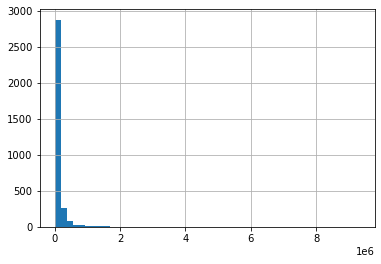

In [279]:
dataNR.PropertyGFATotal.hist(bins=50)
#asymetrie et positive 
#on va crer une colonne de cette valeur en log 

In [280]:
dataNR['PropertyGFATotal'].describe()

count    3.316000e+03
mean     1.157237e+05
std      2.511874e+05
min      1.128500e+04
25%      2.952500e+04
50%      4.924900e+04
75%      1.048145e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

In [281]:
i=dataNR.PropertyGFATotal== 1.128500e+04
#9320156
#le maximum semble etre logique et le minimum
#sum(i)
dataNR[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3363,50204,2016,NonResidential,Other,FIRE STATION 39 (NEW),3834500066,5,NORTH,1949,1.0,1.0,11285,0,Prison/Incarceration,Prison/Incarceration,NaN,57.200001,645665.375,0.0,431795.424,213870.0195,False,Compliant,2806 NE 127th St,Seattle,WA,NaN,47.72126,-122.29735,14.37,1.27


In [282]:
dataNR.PropertyGFAParking.describe()

count      3316.000000
mean      13311.328408
std       43608.544885
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [283]:
i=dataNR.PropertyGFAParking < 0
sum(i) #un seul batiment 
dataNR[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
3136,29551,2015,NonResidential,Office,625 5TH AVE S,8809700040,2,DOWNTOWN,2000,1.0,11.0,68452,-2,"Bank Branch, Office",Office,81.0,53.6,3670298.0,0.0,3670451.0,0.0,False,Compliant,625 5TH AVE S,SEATTLE,WA,98104.0,47.597252,-122.327747,25.59,0.14


In [284]:
dataNR[i].index

Int64Index([3136], dtype='int64')

In [285]:
dataNR=dataNR.drop(index=3136)

In [286]:
j=dataNR['PropertyGFAParking']==512608
sum(j)

2

In [287]:
dataNR[j]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
274,402,2015,NonResidential,Office,US BANK CENTRE,1975700080,7,DOWNTOWN,1989,1.0,46.0,1536606,512608,"Financial Office, Office, Other, Parking, Rest...",Office,90.0,51.200000,55813996.0,0.0,52747171.0,3069000.0,False,Compliant,1420 5TH AVE,SEATTLE,WA,98101.0,47.61048,-122.334542,530.70,0.20
273,402,2016,NonResidential,Office,US BANK CENTRE,1975700080,7,DOWNTOWN,1989,1.0,46.0,1536606,512608,"Financial Office, Office, Other, Parking, Rest...",Office,89.0,51.900002,56606136.0,0.0,53668061.0,2938070.0,False,Compliant,1420 5th Avenue,Seattle,WA,98101.0,47.61054,-122.334660,530.18,0.35


In [288]:
j=dataNR['PropertyGFAParking']==0
sum(j)

2636

In [289]:
dataNR[j].head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,Hotel,Hotel,65.0,78.9,6981428.0,2023032.0,3686160.0,1272388.0,False,Compliant,405 OLIVE WAY,SEATTLE,WA,98101.0,47.612190,-122.337997,249.43,2.64
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,"Hotel, Parking, Swimming Pool",Hotel,18.0,96.6,73130656.0,19660404.0,49762435.0,3709900.0,True,Compliant,1900 5TH AVE,SEATTLE,WA,98101.0,47.613349,-122.337699,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,Hotel,Hotel,1.0,460.4,28229320.0,23458518.0,2769023.0,2001894.0,False,Compliant,620 STEWART ST,SEATTLE,WA,98101.0,47.614216,-122.336609,1936.34,31.38
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,0,Hotel,Hotel,25.0,76.9,6252842.0,0.0,2679698.0,3573255.0,False,Compliant,1619 9TH AVE,SEATTLE,WA,98101.0,47.614114,-122.332741,208.46,2.37
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,0,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,NaN,62.5,6426022.0,2003108.0,4108004.0,315079.0,False,Compliant,901 PINE ST,SEATTLE,WA,98101.0,47.612902,-122.331309,199.99,1.77
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,0,Hotel,Hotel,46.0,77.0,12633744.0,0.0,7355649.0,5278400.0,False,Compliant,612 2ND AVE,SEATTLE,WA,98104.0,47.602589,-122.332553,331.61,1.83
12,17,2015,NonResidential,Hotel,EXECUTIVE PACIFIC PLAZA,942000210,7,DOWNTOWN,1928,1.0,9.0,65009,0,Hotel,Hotel,39.0,104.7,6807227.0,1987163.0,1615057.0,3205074.0,False,Compliant,400 SPRING ST,SEATTLE,WA,98104.0,47.607099,-122.333105,334.87,5.04
14,19,2015,NonResidential,Hotel,HOTEL VINTAGE PARK,942000265,7,DOWNTOWN,1922,1.0,11.0,67390,0,NaN,NaN,14.0,166.1,10711451.0,4403788.0,4089407.0,2218425.0,False,Compliant,1100 5TH AVE,SEATTLE,WA,98101.0,47.607616,-122.332329,486.25,6.95
16,22,2015,NonResidential,Other,DOWNTOWN SEATTLE YMCA,942000350,7,DOWNTOWN,1930,1.0,6.0,103911,0,"Fitness Center/Health Club/Gym, Office, Swimmi...",Fitness Center/Health Club/Gym,NaN,79.5,10340282.0,4398022.0,5288219.0,654260.0,False,Compliant,909 4TH AVE,SEATTLE,WA,98104.0,47.605446,-122.332802,411.09,3.74
18,24,2015,NonResidential,Mixed Use Property,RAINIER CLUB (HISTORICAL LANDMARK),942000510,7,DOWNTOWN,1907,1.0,5.0,57452,0,"Office, Other, Other - Lodging/Residential, Re...",Social/Meeting Hall,NaN,130.2,7481768.0,1755365.0,3773975.0,1952583.0,False,Compliant,810 4TH AVE,SEATTLE,WA,98104.0,47.605526,-122.331630,265.50,4.34


In [290]:
dataNR['PropertyGFAParking'].describe()
#on peut avoir des propriétés sans parking

count      3314.000000
mean      13319.362402
std       43620.478735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [291]:
dataNR.shape

(3314, 31)

In [292]:
dataNR['ENERGYSTARScore'].describe()
#on ne le passe pas  en log on laisse comme ca
#c'est notre score d'energie pour notre batiment

count    2208.000000
mean       64.806612
std        28.564448
min         1.000000
25%        47.000000
50%        72.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [293]:
dataNR['SiteEUI(kBtu/sf)'].describe()
#energie consommée divisé par sa surface 

count    3304.000000
mean       71.640587
std        72.400424
min         0.000000
25%        33.200001
50%        51.700000
75%        81.699997
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64

In [294]:
i=dataNR['SiteEUI(kBtu/sf)'] <= 0
sum(i) #17 batiments 
dataNR[i].head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
44,58,2015,NonResidential,Store,CENTURY SQUARE RETAIL,1975700365,7,DOWNTOWN,1920,1.0,2.0,57428,0,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,NaN,0.0,0.0,0.0,0.0,0.0,False,Compliant,1525 4TH AVE,SEATTLE,WA,98101.0,47.610764,-122.337677,0.00,0.00
572,765,2015,NonResidential,Office,SEATTLE TOWER,1975200005,7,DOWNTOWN,1929,1.0,27.0,216571,13320,"Office, Other - Technology/Science, Parking",Office,NaN,0.0,0.0,0.0,0.0,0.0,False,Compliant,1218 3RD AVE,SEATTLE,WA,98101.0,47.607655,-122.335512,0.00,0.00
28,34,2016,NonResidential,School,MEANY BUILDING,0688000090,3,CENTRAL,1955,1.0,1.0,126351,0,K-12 School,K-12 School,NaN,0.0,0.0,0.0,0.0,0.0,False,Missing Data,301/300 21st Ave. E.,Seattle,WA,98112.0,47.622660,-122.305470,0.00,0.00
31,37,2016,NonResidential,School,JOHN HAY ELEMENTARY,0809000005,7,MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,0,K-12 School,K-12 School,NaN,0.0,0.0,0.0,1496816.0,0.0,False,Missing Data,201 Garfield St.,Seattle,WA,98109.0,47.632900,-122.351720,10.43,0.20
62,87,2016,NonResidential,School,ARBOR HEIGHTS ELEMENTARY,2518400005,1,SOUTHWEST,1948,1.0,2.0,53352,0,K-12 School,K-12 School,NaN,0.0,0.0,0.0,600813.0,0.0,False,Missing Data,3701 S.W. 104th St.,Seattle,WA,98146.0,47.509700,-122.377590,4.19,0.08


In [295]:
dataNR[i].index

Int64Index([44, 572, 28, 31, 62, 81, 85, 95, 133, 139, 152, 614, 630, 746,
            1361, 1894, 3166],
           dtype='int64')

In [296]:
dataNR=dataNR.drop(index=[44, 572, 28, 31, 62, 81, 85, 95, 133, 139, 152, 614, 630, 746,
            1361, 1894, 3166])
#17 batiments a supprimer 

<AxesSubplot:>

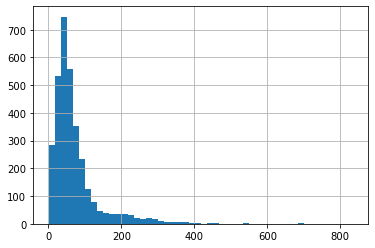

In [297]:
dataNR['SiteEUI(kBtu/sf)'].hist(bins=50)

In [298]:
dataNR.shape

(3281, 31)

In [299]:
dataNR['SiteEnergyUse(kBtu)'].describe()
#la quantite annuelle denergie consommée par un batiment 

count    3.273000e+03
mean     8.129187e+06
std      2.538259e+07
min      0.000000e+00
25%      1.234096e+06
50%      2.539565e+06
75%      6.960904e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [301]:
i=dataNR['SiteEnergyUse(kBtu)'] <= 0
sum(i)
dataNR[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
304,435,2016,NonResidential,Other,WASHINGTON STATE CONVENTION CENTER,1978200105,7,DOWNTOWN,1990,1.0,6.0,1400000,0,"Convention Center, Parking",Convention Center,NaN,NaN,0.0,0.0,0.0,0.0,False,Non-Compliant,705 Pike St,Seattle,WA,98101.0,47.61195,-122.33167,0.0,0.0


In [302]:
dataNR=dataNR.drop(index=dataNR[i].index)

In [303]:
dataNR['SiteEnergyUse(kBtu)'].describe()

count    3.271000e+03
mean     8.128152e+06
std      2.538915e+07
min      1.144100e+04
25%      1.234122e+06
50%      2.539565e+06
75%      6.948314e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

In [304]:
dataNR.shape

(3279, 31)

<AxesSubplot:>

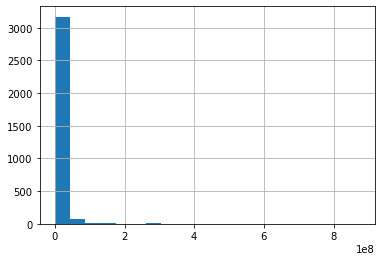

In [308]:
dataNR['SiteEnergyUse(kBtu)'].hist(bins=20)
# on va passer au log

In [309]:
dataNR['SteamUse(kBtu)'].describe()
#la quantite annuelle de vapeur consommée 

count    3.271000e+03
mean     4.986513e+05
std      5.256661e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64

In [310]:
j=dataNR['SteamUse(kBtu)'] <= 0
sum(j)
#on peut avoir des batiments qui ne consomment pas de vapeur 
#on va les laisser

3044

In [311]:
dataNR[j].head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,"Hotel, Parking, Restaurant",Hotel,51.0,94.4,8354235.0,0.0,3905411.0,4448985.0,False,Compliant,724 PINE ST,SEATTLE,WA,98101.0,47.613106,-122.333358,263.51,2.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,"Hotel, Parking, Swimming Pool",Hotel,67.0,120.1,14829099.0,0.0,6066245.0,8763105.0,False,Compliant,401 LENORA ST,SEATTLE,WA,98121.0,47.613754,-122.340924,507.70,4.02
5,9,2015,NonResidential,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1.0,2.0,97288,37198,Police Station,Police Station,NaN,135.7,12051984.0,0.0,7271004.0,4781283.0,False,Compliant,810 VIRGINIA ST,SEATTLE,WA,98101.0,47.616439,-122.336764,304.62,2.81
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,0,Hotel,Hotel,25.0,76.9,6252842.0,0.0,2679698.0,3573255.0,False,Compliant,1619 9TH AVE,SEATTLE,WA,98101.0,47.614114,-122.332741,208.46,2.37
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,0,Hotel,Hotel,46.0,77.0,12633744.0,0.0,7355649.0,5278400.0,False,Compliant,612 2ND AVE,SEATTLE,WA,98104.0,47.602589,-122.332553,331.61,1.83


<AxesSubplot:>

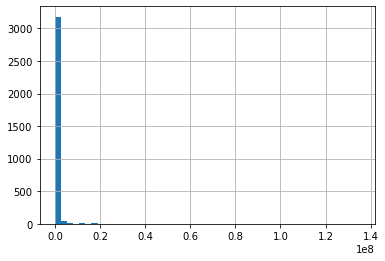

In [312]:
dataNR['SteamUse(kBtu)'].hist(bins=50)
#on va le passer au log 

In [313]:
dataNR['Electricity(kBtu)'].describe()

count    3.271000e+03
mean     5.671943e+06
std      1.750017e+07
min     -1.154170e+05
25%      7.265775e+05
50%      1.633306e+06
75%      4.895128e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

In [314]:
j=dataNR['Electricity(kBtu)'] <= 0
sum(j)
#nous avons 3 batiments avec une consommation annuelle délectricite negative 
#et nulle 

3

In [306]:
dataNR[j]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
426,23854,2016,NonResidential,Restaurant,PIER 57,7666202435,7,DOWNTOWN,1900,1.0,1.0,43728,0,Restaurant,Restaurant,NaN,263.200012,1.150804e+07,0.0,0.0,11508035.0,False,Compliant,1301 Alaskan Way,Seattle,WA,98101.0,47.60613,-122.34115,611.19,13.98
513,700,2016,NonResidential,Store,IUC- WHOLE FOODS INTERBAY,7666201460,7,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176,0,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,31.0,208.800003,1.252517e+07,0.0,0.0,0.0,False,Compliant,2001 15th Avenue West,Seattle,WA,98119.0,47.63718,-122.37734,0.00,0.00
3206,49784,2016,NonResidential,Office,BULLITT CENTER,7234600195,3,CENTRAL,2013,1.0,6.0,52000,0,Office,Office,100.0,7.100000,3.427261e+05,0.0,-115417.0,0.0,False,Compliant,1501 E. Madison St.,Seattle,WA,98122.0,47.61432,-122.31257,-0.80,-0.02


In [315]:
dataNR=dataNR.drop(index=dataNR[j].index)
#nous supprimons ces 6individus 

<AxesSubplot:>

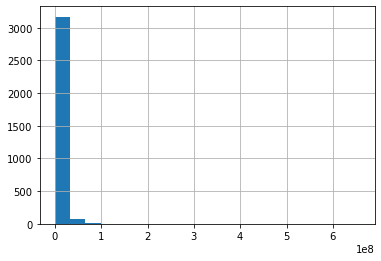

In [316]:
dataNR['Electricity(kBtu)'].hist(bins=20)

In [317]:
dataNR.shape

(3273, 31)

In [318]:
dataNR['NaturalGas(kBtu)'].describe()
#consommation annuelle en gaz 

count    3.265000e+03
mean     1.886900e+06
std      7.946410e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.902330e+05
75%      1.475252e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

In [319]:
j= dataNR['NaturalGas(kBtu)'] == 0
sum(j)
#nous avons 917 batiments qui ont une consommation nulle en gaz 
#nous les laissons car on peut avoir des batiments qui ne consomment
#que de lelectricite 
#pas de negatif 

917

<AxesSubplot:>

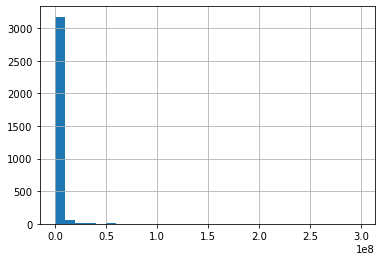

In [320]:
dataNR['NaturalGas(kBtu)'].hist(bins=30)
#consommation en gaz
#asymetrie on va passer au log 

In [321]:
dataNR['TotalGHGEmissions'].describe()

count     3265.000000
mean       178.359026
std        670.665343
min          0.080000
25%         19.980000
50%         49.280000
75%        139.210000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [322]:
i=dataNR['TotalGHGEmissions'] == 0.08
sum(i)
#on va laisser cette propriete 

1

In [323]:
dataNR[i] #c'est une propriété écologique 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
1916,23730,2015,NonResidential,Warehouse,SALMON BAY TERMINALS - RSVP BLDG,7666200120,7,MAGNOLIA / QUEEN ANNE,1948,1.0,1.0,46970,0,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,NaN,0.2,11441.0,0.0,11442.0,0.0,False,Compliant,4021 13TH AVE W,SEATTLE,WA,98119.0,47.656859,-122.375239,0.08,0.0


<AxesSubplot:>

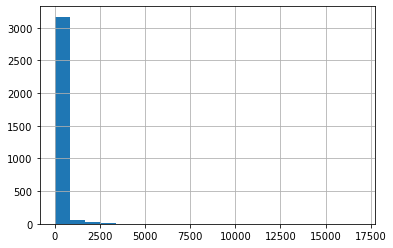

In [324]:
dataNR['TotalGHGEmissions'].hist(bins=20)
#quantite demission en CO2
#on va le passer en log pour que sa distribution soit normale 

In [325]:
dataNR['GHGEmissionsIntensity'].describe()
#emission CO2 divisé par la surface du batiment

count    3265.000000
mean        1.488481
std         2.214487
min         0.000000
25%         0.280000
50%         0.790000
75%         1.770000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [326]:
i=dataNR['GHGEmissionsIntensity'] == 0
sum(i)
# 8 batiments qui nemet pas de gaz a effet serre
#impossible on va les supprimer 

8

In [327]:
dataNR[i]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
599,797,2015,NonResidential,Refrigerated Warehouse,SEATTLE COLD STORAGE,5367204100,2,GREATER DUWAMISH,1969,1.0,1.0,71718,0,NaN,NaN,NaN,0.9,93802.00000,0.0,93806.0,0.0,False,Compliant,303 S RIVER ST,SEATTLE,WA,98108.0,47.543298,-122.330878,0.65,0.0
1239,21315,2015,NonResidential,Office,1518 5TH AVE OFFICE,1975700135,7,DOWNTOWN,1903,1.0,3.0,57720,0,Office,Office,100.0,1.8,43943.00000,0.0,43945.0,0.0,False,Compliant,1520 5TH AVE,SEATTLE,WA,98101.0,47.611309,-122.335723,0.31,0.0
1306,21474,2015,NonResidential,Other,SULTAN HOTEL/LUSTY LADY,1976200060,7,DOWNTOWN,1900,1.0,3.0,49760,0,Other,Other,NaN,1.0,24126.00000,0.0,24127.0,0.0,False,Compliant,1315 1ST AVE,SEATTLE,WA,98101.0,47.607051,-122.339036,0.17,0.0
1594,22548,2015,NonResidential,Self-Storage Facility,SELF STORAGE MINI WAREHOUSE,2770603955,7,MAGNOLIA / QUEEN ANNE,1915,1.0,3.0,39952,0,Self-Storage Facility,Self-Storage Facility,NaN,1.3,53401.00000,0.0,53404.0,0.0,False,Compliant,2648 15TH AVE W,SEATTLE,WA,98119.0,47.644213,-122.375748,0.37,0.0
1916,23730,2015,NonResidential,Warehouse,SALMON BAY TERMINALS - RSVP BLDG,7666200120,7,MAGNOLIA / QUEEN ANNE,1948,1.0,1.0,46970,0,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,NaN,0.2,11441.00000,0.0,11442.0,0.0,False,Compliant,4021 13TH AVE W,SEATTLE,WA,98119.0,47.656859,-122.375239,0.08,0.0
2212,24717,2015,NonResidential,Other,1701 1ST AVE S,7666207085,2,GREATER DUWAMISH,1910,1.0,3.0,27690,0,"Other, Parking",Other,NaN,0.7,17150.00000,0.0,17150.0,0.0,False,Compliant,1701 1ST AVE S,SEATTLE,WA,98134.0,47.587876,-122.334577,0.12,0.0
1229,21315,2016,NonResidential,Office,1518 FIFITH AVE,1975700135,7,DOWNTOWN,1903,1.0,3.0,57720,0,Office,Office,NaN,1.0,24105.50000,0.0,24105.0,0.0,False,Non-Compliant,1520 Fifth Ave,Seattle,WA,98101.0,47.611190,-122.335810,0.17,0.0
2189,24717,2016,NonResidential,Other,1701 FIRST AVE SOUTH LLC,7666207085,2,GREATER DUWAMISH,1910,1.0,3.0,27690,0,"Other, Parking",Other,NaN,0.7,16808.90039,0.0,16809.0,0.0,False,Non-Compliant,1701 First Ave South,Seattle,WA,98134.0,47.587880,-122.334580,0.12,0.0


In [328]:
dataNR=dataNR.drop(index=dataNR[i].index)

In [329]:
dataNR.shape

(3261, 31)

<AxesSubplot:>

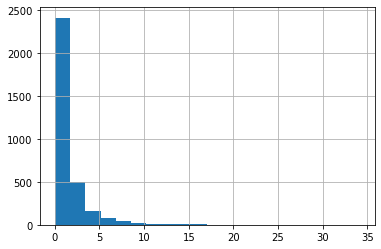

In [330]:
dataNR['GHGEmissionsIntensity'].hist(bins=20)

In [331]:
dataNR.shape
#on  passe de 3318 a 3261 lignes soit 145 lignes supprimés 

(3261, 31)

## Transformation en LOGbase10

In [332]:
dataNR['PropertyGFATotal'].describe()

count    3.261000e+03
mean     1.157467e+05
std      2.520925e+05
min      1.128500e+04
25%      2.939400e+04
50%      4.888200e+04
75%      1.047860e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

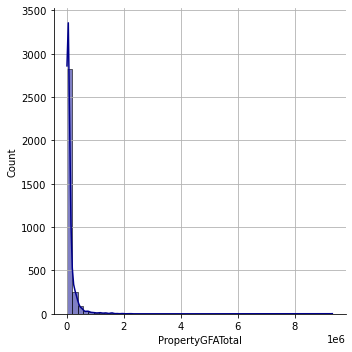

In [333]:
sns.displot(x='PropertyGFATotal',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [334]:
dataNR['PropertyGFATotalLog']=dataNR.PropertyGFATotal.apply(lambda i: np.log10(i) if i > 0 else np.NaN)
#pour avoir la bonne valeur on passe à la puissance 10

In [335]:
dataNR['PropertyGFATotalLog'].isna().sum()

0

In [336]:
dataNR.shape

(3261, 32)

In [337]:
dataNR.PropertyGFATotalLog.describe()

count    3261.000000
mean        4.795480
std         0.412522
min         4.052502
25%         4.468259
50%         4.689149
75%         5.020303
max         6.969423
Name: PropertyGFATotalLog, dtype: float64

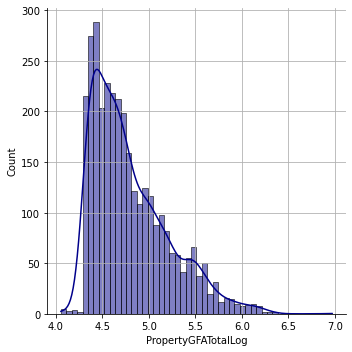

In [338]:
sns.displot(x='PropertyGFATotalLog',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [339]:
dataNR['PropertyGFAParking'].describe()

count      3261.000000
mean      13367.280895
std       43660.889630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [340]:
dataNR.PropertyGFAParking.isna().sum()

0

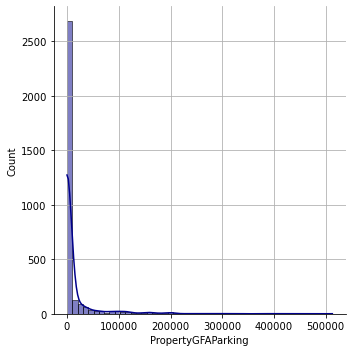

In [341]:
sns.displot(x='PropertyGFAParking',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [343]:
dataNR['SiteEUI(kBtu/sf)Log']=dataNR['SiteEUI(kBtu/sf)'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

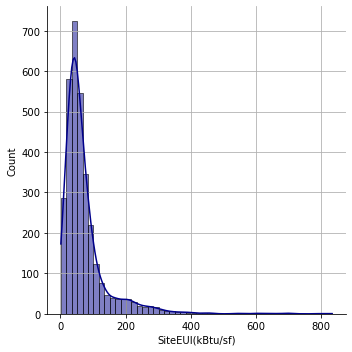

In [344]:
sns.displot(x='SiteEUI(kBtu/sf)',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [345]:
dataNR['SiteEUI(kBtu/sf)Log'].describe()

count    3253.000000
mean        1.712254
std         0.361343
min         0.146128
25%         1.527630
50%         1.716838
75%         1.913814
max         2.921374
Name: SiteEUI(kBtu/sf)Log, dtype: float64

In [346]:
dataNR['SiteEUI(kBtu/sf)Log'].isna().sum()

8

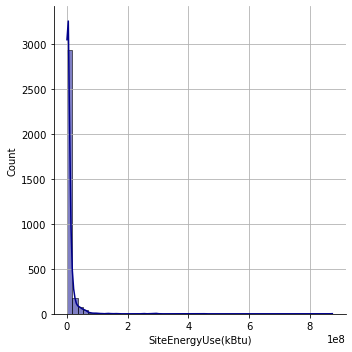

In [347]:
sns.displot(x='SiteEnergyUse(kBtu)',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [348]:
dataNR['SiteEnergyUse(kBtu)Log']=dataNR['SiteEnergyUse(kBtu)'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

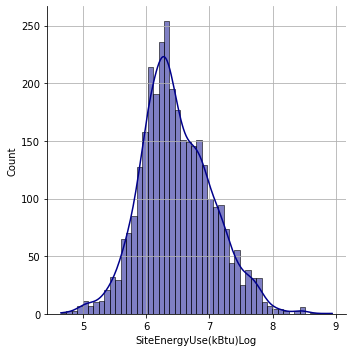

In [349]:
sns.displot(x='SiteEnergyUse(kBtu)Log',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [350]:
dataNR['SiteEnergyUse(kBtu)Log'].isna().sum()

8

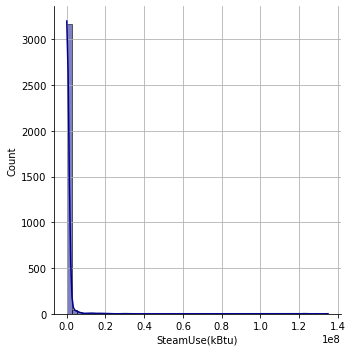

In [351]:
sns.displot(x='SteamUse(kBtu)',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [352]:
dataNR['SteamUse(kBtu)Log']=dataNR['SteamUse(kBtu)'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

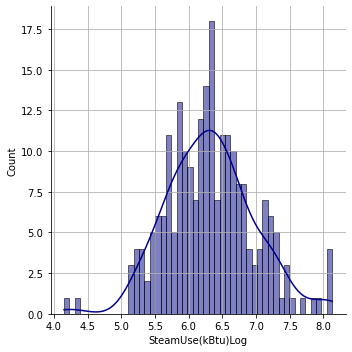

In [353]:
sns.displot(x='SteamUse(kBtu)Log',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [354]:
dataNR['SteamUse(kBtu)Log'].isna().sum()

3034

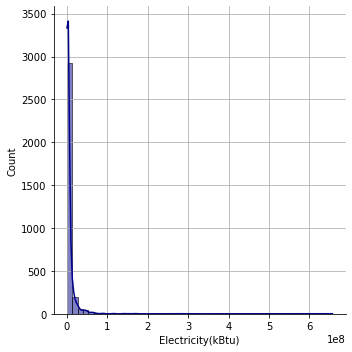

In [355]:
sns.displot(x='Electricity(kBtu)',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [356]:
dataNR['Electricity(kBtu)Log']=dataNR['Electricity(kBtu)'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

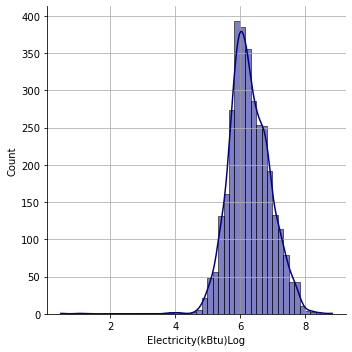

In [357]:
sns.displot(x='Electricity(kBtu)Log',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [350]:
dataNR['Electricity(kBtu)Log'].isna().sum()

8

In [358]:
i=dataNR['Electricity(kBtu)Log'] <= 2
sum(i)

2

In [359]:
dataNR[i]
#ce sont des habitations ecologiques je pense quil consomme
#de lenergie solaire 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFATotalLog,SiteEUI(kBtu/sf)Log,SiteEnergyUse(kBtu)Log,SteamUse(kBtu)Log,Electricity(kBtu)Log
1689,23064,2015,NonResidential,Other,EVERGREEN-WASHELLI,3026049008,5,NORTHWEST,1970,1.0,1.0,23166,0,Other,Other,NaN,142.2,3294645.00,0.0,11.0,3294634.0,False,Compliant,11111 AURORA AVE N,SEATTLE,WA,98133.0,47.709696,-122.34566,174.98,7.55,4.364851,2.152900,6.517809,NaN,1.041393
1670,23064,2016,NonResidential,Other,EVERGREEN WASHELLI,3026049008,5,NORTHWEST,1970,5.0,1.0,23166,0,Other,Other,NaN,150.0,3475804.25,0.0,3.0,3475801.0,False,Compliant,11111 Aurora Ave. N,Seattle,WA,98133.0,47.709690,-122.34557,184.60,7.97,4.364851,2.176091,6.541055,NaN,0.477121


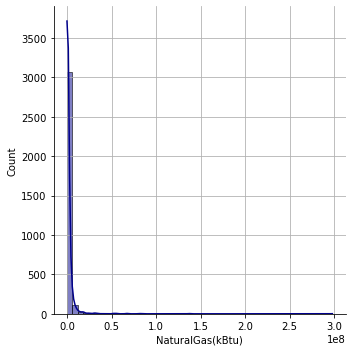

In [360]:
sns.displot(x='NaturalGas(kBtu)',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [361]:
dataNR['NaturalGas(kBtu)Log']=dataNR['NaturalGas(kBtu)'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

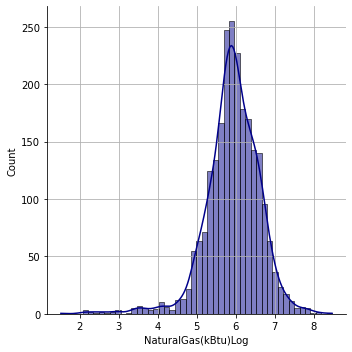

In [362]:
sns.displot(x='NaturalGas(kBtu)Log',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [363]:
dataNR['NaturalGas(kBtu)Log'].isna().sum()

916

In [364]:
dataNR['TotalGHGEmissionsLog']=dataNR['TotalGHGEmissions'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

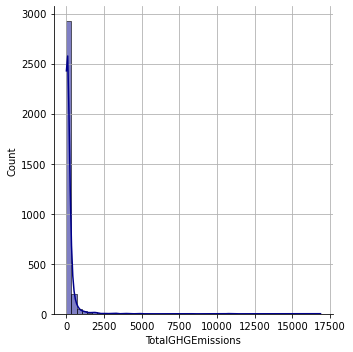

In [365]:
sns.displot(x='TotalGHGEmissions',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

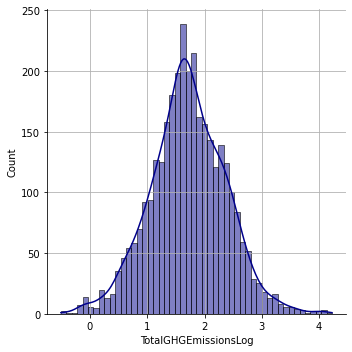

In [366]:
sns.displot(x='TotalGHGEmissionsLog',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [367]:
dataNR['TotalGHGEmissionsLog'].isna().sum()

8

In [368]:
dataNR['GHGEmissionsIntensityLog']=dataNR['GHGEmissionsIntensity'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

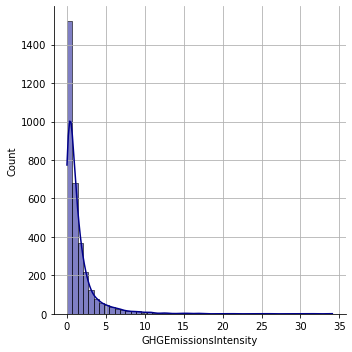

In [369]:
sns.displot(x='GHGEmissionsIntensity',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

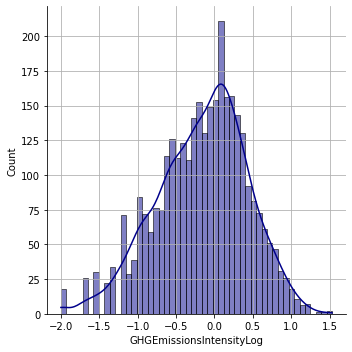

In [370]:
sns.displot(x='GHGEmissionsIntensityLog',data=dataNR, kde=True, bins=50,color="darkblue")
plt.grid()

In [371]:
dataNR['GHGEmissionsIntensityLog'].isna().sum()

8

In [372]:
i=dataNR['GHGEmissionsIntensityLog'] < 0
sum(i)

1837

In [373]:
dataNR[i].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFATotalLog,SiteEUI(kBtu/sf)Log,SiteEnergyUse(kBtu)Log,SteamUse(kBtu)Log,Electricity(kBtu)Log,NaturalGas(kBtu)Log,TotalGHGEmissionsLog,GHGEmissionsIntensityLog
15,21,2015,NonResidential,Other,SEATTLE CENTRAL LIBRARY,942000275,7,DOWNTOWN,2004,1.0,11.0,412000,57000,"Data Center, Library, Parking",Library,NaN,46.0,16849234.0,703184.0,16146718.0,0.0,False,Compliant,1000 4TH AVE,SEATTLE,WA,98104.0,47.606675,-122.332264,166.84,0.24,5.614897,1.662758,7.226580,5.847069,7.208084,NaN,2.222300,-0.619789
22,28,2015,NonResidential,School,GRAHAM HILL ELEMENTARY SCHOOL (SPS-DISTRICT),1102000138,2,SOUTHEAST,1961,1.0,2.0,56228,0,K-12 School,K-12 School,96.0,25.1,1454222.0,0.0,911659.0,542600.0,True,Compliant,5101 S GRAHAM ST,SEATTLE,WA,98118.0,47.545701,-122.268584,35.17,0.56,4.749953,1.399674,6.162631,NaN,5.959832,5.734480,1.546172,-0.251812
25,31,2015,NonResidential,Other,SEATTLE HONDA,660001725,7,DOWNTOWN,1930,1.0,2.0,67224,0,Automobile Dealership,Automobile Dealership,NaN,20.7,1388717.0,0.0,1388775.0,0.0,False,Compliant,1017 OLIVE WAY,SEATTLE,WA,98101.0,47.614906,-122.330401,9.68,0.06,4.827524,1.315970,6.142614,NaN,6.142632,NaN,0.985875,-1.221849
34,41,2015,NonResidential,Self-Storage Facility,QFC / SHURGARD MINI STORAGE / LIQUOR STORE,925049330,4,NORTHEAST,1955,1.0,2.0,126394,0,Self-Storage Facility,Self-Storage Facility,77.0,11.7,306721.0,0.0,272732.0,34000.0,False,Compliant,2746 NE 45TH ST,SEATTLE,WA,98105.0,47.662703,-122.296123,3.71,0.02,5.101726,1.068186,5.486744,NaN,5.435736,4.531479,0.569374,-1.698970
35,46,2015,NonResidential,Warehouse,SEATTLE WAREHOUSE OFFICE BUILDING,323049024,2,GREATER DUWAMISH,1961,7.0,2.0,714095,0,NaN,NaN,1.0,66.9,47843892.0,0.0,47845869.0,0.0,False,Compliant,3301 S NORFOLK ST,SEATTLE,WA,98118.0,47.510603,-122.290276,333.54,0.18,5.853756,1.825426,7.679827,NaN,7.679844,NaN,2.523148,-0.744727


In [374]:
dataNR.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Address',
       'City', 'State', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'PropertyGFATotalLog',
       'SiteEUI(kBtu/sf)Log', 'SiteEnergyUse(kBtu)Log', 'SteamUse(kBtu)Log',
       'Electricity(kBtu)Log', 'NaturalGas(kBtu)Log', 'TotalGHGEmissionsLog',
       'GHGEmissionsIntensityLog'],
      dtype='object')

In [368]:
dataNR.shape

(3261, 39)

# Recherche de batiments identiques 

In [382]:
dataNR.shape

(3261, 39)

In [383]:
dataNR.duplicated(subset='OSEBuildingID').sum()
#pour l'identifiant nous avons 1572 proprietes dont on a fait les mesures deux fois 
#nous avons 1572 batiment qui sont mesures deux fois pour 2015 et 2016
#nous allons regarder c'est quoi ces batiments 

1572

In [387]:
dataNR[dataNR.duplicated(subset='OSEBuildingID')].head(5)
#c'est quoi les batiments mesurés deux fois 2015 et 2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFATotalLog,SiteEUI(kBtu/sf)Log,SiteEnergyUse(kBtu)Log,SteamUse(kBtu)Log,Electricity(kBtu)Log,NaturalGas(kBtu)Log,TotalGHGEmissionsLog,GHGEmissionsIntensityLog
0,1,2016,NonResidential,Hotel,MAYFLOWER PARK HOTEL,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,Hotel,Hotel,60.0,81.699997,7226362.5,2003882.00,3946027.0,1276453.0,False,Compliant,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799,249.98,2.83,4.946619,1.912222,6.858920,6.301872,6.596160,6.106005,2.397905,0.451786
1,2,2016,NonResidential,Hotel,PARAMOUNT HOTEL,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,"Hotel, Parking, Restaurant",Hotel,61.0,94.800003,8387933.0,0.00,3242851.0,5145082.0,False,Compliant,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393,295.86,2.86,5.015217,1.976808,6.923655,NaN,6.510927,6.711392,2.471086,0.456366
2,3,2016,NonResidential,Hotel,5673-THE WESTIN SEATTLE,0659000475,7,DOWNTOWN,1969,1.0,41.0,956110,196718,Hotel,Hotel,43.0,96.000000,72587024.0,21566554.00,49526664.0,1493800.0,False,Compliant,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810,2089.28,2.19,5.980508,1.982271,7.860859,7.333781,7.694839,6.174292,3.319997,0.340444
3,5,2016,NonResidential,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,Hotel,Hotel,56.0,110.800003,6794584.0,2214446.25,2768924.0,1811213.0,False,Compliant,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664,286.43,4.67,4.787602,2.044540,6.832163,6.345265,6.442311,6.257970,2.457019,0.669317
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,1980,1.0,18.0,175580,62000,"Hotel, Parking, Swimming Pool",Hotel,75.0,114.800003,14172606.0,0.00,5368607.0,8803998.0,False,Compliant,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047,505.01,2.88,5.244475,2.059942,7.151450,NaN,6.729862,6.944680,2.703300,0.459392


In [389]:
dataNR['OSEBuildingID'].value_counts().head(10)
#on remarque que certains identifiants sont présents plus de deux fois
#ce sont des batiments mesurés deux fois 

22480    2
25025    2
481      2
23008    2
477      2
475      2
473      2
471      2
469      2
467      2
Name: OSEBuildingID, dtype: int64

In [390]:
dataNR['OSEBuildingID'].value_counts().shape
#les 1572 ce sont des propriétés mesures deux fois 
#en réalité nous avons 1689 
#nous avons 1689 identifiants 

(1689,)

In [391]:
dataNR.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').shape
#on groupe notre data frame par la variable OSEBUILDINGID
#on filtre tous les identifiants ayant au moins supérieur à 1
#on trie en fonction de l'identifiants et 

#nous avons 3144 lignes avec des batiments mesurés deux fois sur 3261
#donc 117 propriétés qui sont mesurés une fois 

(3144, 39)

In [393]:
dataNR.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').head(5)
#on groupe notre data frame par la variable OSEBUILDINGID
#on filtre tous les identifiants ayant au moins supérieur à 1
#on trie en fonction de l'identifiants et 

#nous avons 2986 lignes avec des doublons sur 3261 
#donc 187 lignes batiments qui sont uniques 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFATotalLog,SiteEUI(kBtu/sf)Log,SiteEnergyUse(kBtu)Log,SteamUse(kBtu)Log,Electricity(kBtu)Log,NaturalGas(kBtu)Log,TotalGHGEmissionsLog,GHGEmissionsIntensityLog
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,Hotel,Hotel,65.0,78.900000,6981428.0,2023032.0,3686160.0,1272388.0,False,Compliant,405 OLIVE WAY,SEATTLE,WA,98101.0,47.612190,-122.337997,249.43,2.64,4.946619,1.897077,6.843944,6.306003,6.566574,6.104620,2.396949,0.421604
0,1,2016,NonResidential,Hotel,MAYFLOWER PARK HOTEL,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,Hotel,Hotel,60.0,81.699997,7226362.5,2003882.0,3946027.0,1276453.0,False,Compliant,405 Olive way,Seattle,WA,98101.0,47.612200,-122.337990,249.98,2.83,4.946619,1.912222,6.858920,6.301872,6.596160,6.106005,2.397905,0.451786
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,"Hotel, Parking, Restaurant",Hotel,51.0,94.400000,8354235.0,0.0,3905411.0,4448985.0,False,Compliant,724 PINE ST,SEATTLE,WA,98101.0,47.613106,-122.333358,263.51,2.38,5.015217,1.974972,6.921907,NaN,6.591667,6.648261,2.420797,0.376577
1,2,2016,NonResidential,Hotel,PARAMOUNT HOTEL,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,"Hotel, Parking, Restaurant",Hotel,61.0,94.800003,8387933.0,0.0,3242851.0,5145082.0,False,Compliant,724 Pine street,Seattle,WA,98101.0,47.613170,-122.333930,295.86,2.86,5.015217,1.976808,6.923655,NaN,6.510927,6.711392,2.471086,0.456366
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,"Hotel, Parking, Swimming Pool",Hotel,18.0,96.600000,73130656.0,19660404.0,49762435.0,3709900.0,True,Compliant,1900 5TH AVE,SEATTLE,WA,98101.0,47.613349,-122.337699,2061.48,1.92,5.983171,1.984977,7.864099,7.293592,7.696902,6.569362,3.314179,0.283301


In [394]:
dataNR.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Address',
       'City', 'State', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'PropertyGFATotalLog',
       'SiteEUI(kBtu/sf)Log', 'SiteEnergyUse(kBtu)Log', 'SteamUse(kBtu)Log',
       'Electricity(kBtu)Log', 'NaturalGas(kBtu)Log', 'TotalGHGEmissionsLog',
       'GHGEmissionsIntensityLog'],
      dtype='object')

## Différence de consommation 

Text(0.5, 1.0, 'Consommation énergie pour 2015 et 2016')

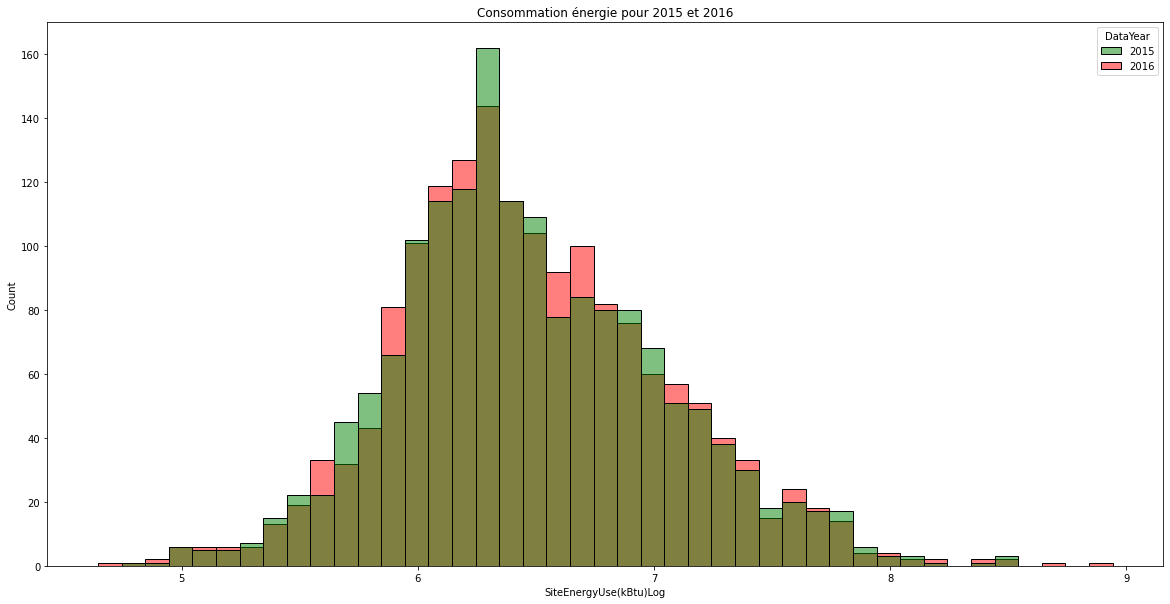

In [395]:
plt.figure(figsize=(20,10))
sns.histplot(x='SiteEnergyUse(kBtu)Log',data=dataNR,hue='DataYear',palette=['green','red'])
plt.title('Consommation énergie pour 2015 et 2016')

## Ecart de consommation

In [396]:
ecart= dataNR.groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID').groupby('OSEBuildingID')['SiteEnergyUse(kBtu)Log'].agg(['min','max','mean']).reset_index()
#on va calculer le minimum  le maximum et la moyenne

In [397]:
ecart.head(5)

,OSEBuildingID,min,max,mean
0,1,6.843944,6.858920,6.851432
1,2,6.921907,6.923655,6.922781
2,3,7.860859,7.864099,7.862479
3,5,6.832163,7.450700,7.141432
4,8,7.151450,7.171115,7.161282


In [398]:
ecart['difference']=((ecart['max']-ecart['min']))
ecart['Pourcentagediff']=(ecart['difference']/ecart['mean'])*100

In [399]:
ecart.head(5)

,OSEBuildingID,min,max,mean,difference,Pourcentagediff
0,1,6.843944,6.858920,6.851432,0.014975,0.218574
1,2,6.921907,6.923655,6.922781,0.001748,0.025254
2,3,7.860859,7.864099,7.862479,0.003240,0.041214
3,5,6.832163,7.450700,7.141432,0.618538,8.661254
4,8,7.151450,7.171115,7.161282,0.019665,0.274602


Text(0.5, 0, 'La différence en pourcentage')

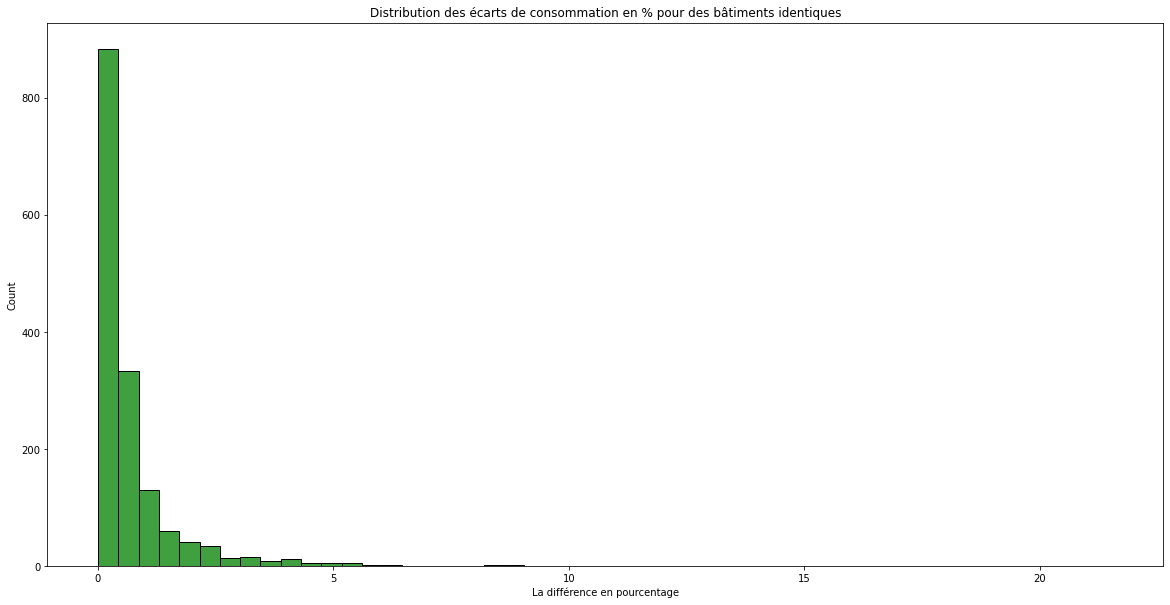

In [400]:
plt.figure(figsize=(20,10))
plt.title('Distribution des écarts de consommation en % pour des bâtiments identiques')
sns.histplot(ecart['Pourcentagediff'],bins=50,color='green')
plt.xlabel('La différence en pourcentage')
# le plus gros écart de consommation est comprise en 0 et 20 %

In [401]:
dataNR.shape

(3261, 39)

## Consommation moyenne

In [405]:
dataNR.select_dtypes('object').columns
#Nous allons prendre les variables qui nous semblent les plus pertinentes
#pour l'etude
#buildingtype= le type de batiment
#primarypropertytype=l'usage principal de la propriete
#neighborhood le voisinage 

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'DefaultData',
       'ComplianceStatus', 'Address', 'City', 'State'],
      dtype='object')

In [406]:
dataNR.select_dtypes(['int64','float64']).columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'PropertyGFATotalLog',
       'SiteEUI(kBtu/sf)Log', 'SiteEnergyUse(kBtu)Log', 'SteamUse(kBtu)Log',
       'Electricity(kBtu)Log', 'NaturalGas(kBtu)Log', 'TotalGHGEmissionsLog',
       'GHGEmissionsIntensityLog'],
      dtype='object')

In [407]:
dataNR['OSEBuildingID'].unique().shape

(1689,)

In [408]:
dataFinal=dataNR.groupby(['OSEBuildingID','PrimaryPropertyType', 'BuildingType','Neighborhood']).agg(['mean']).reset_index()

#reset_index remet les variables en colonnes 
#on va regrouper tous les identifiants unique ensemble
#puis on regroupe les type ensembles
#ceux qui ont le meme nom ensemble
#on regroupe le type de residence
#puis les voisinages 

In [409]:
dataFinal.shape 
# on a le nmbre d'identifiants unique et on a calcule la moyenne
#de toutes nos mesures 


(1689, 30)

In [410]:
dataFinal.groupby("OSEBuildingID").filter(lambda x: len(x) > 1)

,OSEBuildingID,PrimaryPropertyType,BuildingType,Neighborhood,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFATotalLog,SiteEUI(kBtu/sf)Log,SiteEnergyUse(kBtu)Log,SteamUse(kBtu)Log,Electricity(kBtu)Log,NaturalGas(kBtu)Log,TotalGHGEmissionsLog,GHGEmissionsIntensityLog
,,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean


## Vérification des identifiants 

In [411]:
list_id=dataFinal.groupby(['OSEBuildingID']).agg({'OSEBuildingID':['count']})

In [412]:
#list_id

In [413]:
def Colonne(b):
    l=len(b)
    c=[]
    for i in range(l):
        c.append(b[i][0])
    return c


In [414]:
dataFinal.columns=Colonne(dataFinal.columns)

In [415]:
dataFinal.shape
#dataFinal contient les doublons nous avons calcules la moyenne 
#dataSD sans les doublons 
#nous avons pris les 4 qualitatives ainsi que les 28 quantitatives 
#pkoi on a 951 lignes en moins
#nous avons 1698 immeubles qui n'apparaissent qu'une seule année sans doublons 
#nous avons 1620 immeubles qui apparaissent deux sur 2015 et 2016

(1689, 30)

In [416]:
dataFinal.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'BuildingType', 'Neighborhood',
       'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ZipCode',
       'Latitude', 'Longitude', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'PropertyGFATotalLog', 'SiteEUI(kBtu/sf)Log', 'SiteEnergyUse(kBtu)Log',
       'SteamUse(kBtu)Log', 'Electricity(kBtu)Log', 'NaturalGas(kBtu)Log',
       'TotalGHGEmissionsLog', 'GHGEmissionsIntensityLog'],
      dtype='object')

In [417]:
Missing(dataFinal)

OSEBuildingID                0.000000
PrimaryPropertyType          0.000000
BuildingType                 0.000000
Neighborhood                 0.000000
DataYear                     0.000000
CouncilDistrictCode          0.000000
YearBuilt                    0.000000
NumberofBuildings            0.000000
NumberofFloors               0.000000
PropertyGFATotal             0.000000
PropertyGFAParking           0.000000
ENERGYSTARScore             32.089994
SiteEUI(kBtu/sf)             0.059207
SiteEnergyUse(kBtu)          0.059207
SteamUse(kBtu)               0.059207
Electricity(kBtu)            0.059207
NaturalGas(kBtu)             0.059207
ZipCode                      0.947306
Latitude                     0.000000
Longitude                    0.000000
TotalGHGEmissions            0.059207
GHGEmissionsIntensity        0.059207
PropertyGFATotalLog          0.000000
SiteEUI(kBtu/sf)Log          0.059207
SiteEnergyUse(kBtu)Log       0.059207
SteamUse(kBtu)Log           93.072824
Electricity(

In [418]:
dataFinal.head()

,OSEBuildingID,PrimaryPropertyType,BuildingType,Neighborhood,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ZipCode,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,PropertyGFATotalLog,SiteEUI(kBtu/sf)Log,SiteEnergyUse(kBtu)Log,SteamUse(kBtu)Log,Electricity(kBtu)Log,NaturalGas(kBtu)Log,TotalGHGEmissionsLog,GHGEmissionsIntensityLog
0,1,Hotel,NonResidential,DOWNTOWN,2015.5,7.0,1927,1.0,12.0,88434.0,0.0,62.5,80.299998,7103895.25,2.013457e+06,3816093.5,1274420.5,98101.0,47.612195,-122.337994,249.705,2.735,4.946619,1.904650,6.851432,6.303937,6.581367,6.105312,2.397427,0.436695
1,2,Hotel,NonResidential,DOWNTOWN,2015.5,7.0,1996,1.0,11.0,103566.0,15064.0,56.0,94.600002,8371084.00,0.000000e+00,3574131.0,4797033.5,98101.0,47.613138,-122.333644,279.685,2.620,5.015217,1.975890,6.922781,NaN,6.551297,6.679827,2.445942,0.416471
2,3,Hotel,NonResidential,DOWNTOWN,2015.5,7.0,1969,1.0,41.0,959050.0,98359.0,30.5,96.300000,72858840.00,2.061348e+07,49644549.5,2601850.0,98101.0,47.613639,-122.337900,2075.380,2.055,5.981839,1.983624,7.862479,7.313687,7.695870,6.371827,3.317088,0.311873
3,5,Hotel,NonResidential,DOWNTOWN,2015.5,7.0,1926,1.0,10.0,61320.0,0.0,28.5,285.600002,17511952.00,1.283648e+07,2768973.5,1906553.5,98101.0,47.614168,-122.336624,1111.385,18.025,4.787602,2.353838,7.141432,6.857783,6.442319,6.279705,2.872000,1.082985
4,8,Hotel,NonResidential,DOWNTOWN,2015.5,7.0,1980,1.0,18.0,147735.0,37230.0,71.0,117.450002,14500852.50,0.000000e+00,5717426.0,8783551.5,98121.0,47.613752,-122.340697,506.355,3.450,5.161629,2.069742,7.161282,NaN,6.756391,6.943669,2.704454,0.531809


In [419]:
dataFinal.shape

(1689, 30)

In [420]:
dataFinal.dtypes.value_counts()

float64    25
object      3
int64       2
dtype: int64

In [421]:
dataFinal.select_dtypes('object').columns

Index(['PrimaryPropertyType', 'BuildingType', 'Neighborhood'], dtype='object')

In [422]:
dataFinal.select_dtypes(['int64','float64']).columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ZipCode', 'Latitude', 'Longitude',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'PropertyGFATotalLog',
       'SiteEUI(kBtu/sf)Log', 'SiteEnergyUse(kBtu)Log', 'SteamUse(kBtu)Log',
       'Electricity(kBtu)Log', 'NaturalGas(kBtu)Log', 'TotalGHGEmissionsLog',
       'GHGEmissionsIntensityLog'],
      dtype='object')

In [423]:
dataFinal=dataFinal.drop(columns=['OSEBuildingID', 'DataYear', 'CouncilDistrictCode','ZipCode'])

In [424]:
dataFinal.select_dtypes(['int64','float64']).columns

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'Latitude', 'Longitude', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'PropertyGFATotalLog', 'SiteEUI(kBtu/sf)Log',
       'SiteEnergyUse(kBtu)Log', 'SteamUse(kBtu)Log', 'Electricity(kBtu)Log',
       'NaturalGas(kBtu)Log', 'TotalGHGEmissionsLog',
       'GHGEmissionsIntensityLog'],
      dtype='object')

# Sélection features  pour éviter data leakage 

<AxesSubplot:>

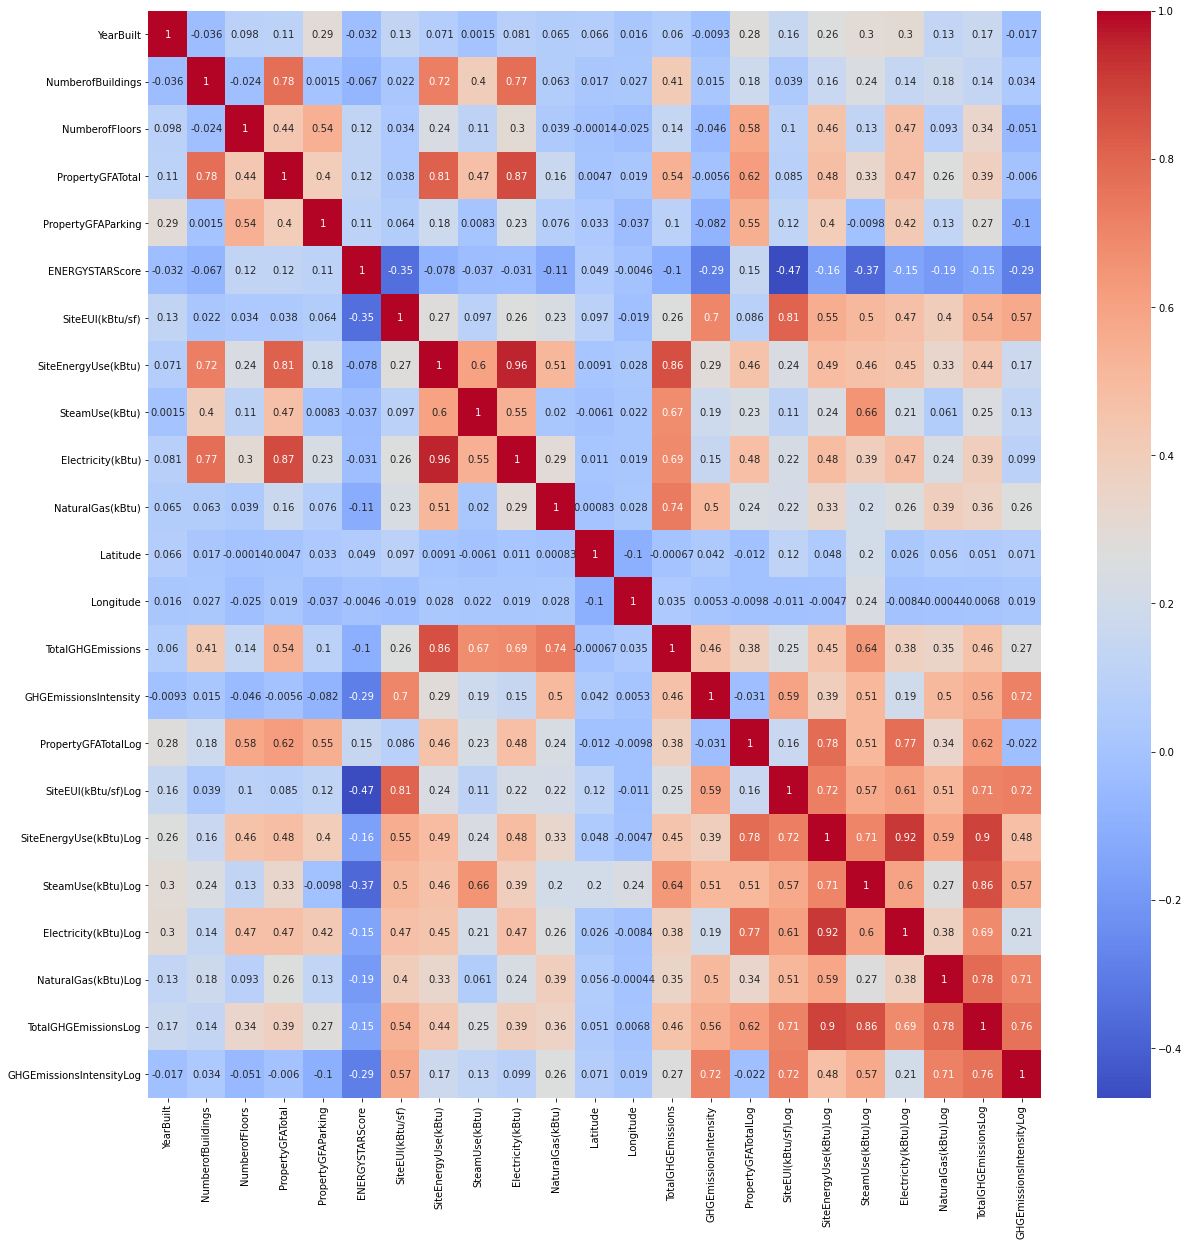

In [425]:
cor=dataFinal.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [426]:
features=['PrimaryPropertyType','Neighborhood','YearBuilt','NumberofBuildings',\
         'NumberofFloors','PropertyGFATotalLog','PropertyGFAParking', 'SiteEnergyUse(kBtu)Log','TotalGHGEmissionsLog','ENERGYSTARScore','Latitude', 'Longitude']

In [427]:
len(features) #12 variables slectionnés

12

In [428]:
index=dataFinal.columns.isin(features)

In [429]:
dataEtude=dataFinal[dataFinal.columns[index]]

In [430]:
dataEtude.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking', 'ENERGYSTARScore', 'Latitude',
       'Longitude', 'PropertyGFATotalLog', 'SiteEnergyUse(kBtu)Log',
       'TotalGHGEmissionsLog'],
      dtype='object')

In [431]:
dataEtude.shape

(1689, 12)

In [432]:
dataEtude.tail(10)

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,Latitude,Longitude,PropertyGFATotalLog,SiteEnergyUse(kBtu)Log,TotalGHGEmissionsLog
1679,Office,MAGNOLIA / QUEEN ANNE,1952,1.0,1.0,0.0,75.0,47.63572,-122.37525,4.135482,5.701281,0.544068
1680,Other,EAST,1912,1.0,1.0,0.0,NaN,47.63228,-122.31574,4.370050,6.776428,2.413669
1681,Mixed Use Property,CENTRAL,1994,1.0,1.0,0.0,NaN,47.60775,-122.30225,4.302114,6.258495,1.783975
1682,Office,SOUTHEAST,1960,1.0,1.0,0.0,93.0,47.56440,-122.27813,4.187464,5.588619,0.891537
1683,Other,DELRIDGE,1982,1.0,1.0,0.0,NaN,47.54067,-122.37441,4.261525,5.969454,1.308137
1684,Office,GREATER DUWAMISH,1990,1.0,1.0,0.0,46.0,47.56722,-122.31154,4.089693,5.929289,1.320977
1685,Other,DOWNTOWN,2004,1.0,1.0,0.0,NaN,47.59625,-122.32283,4.204120,5.977850,1.507451
1686,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,0.0,NaN,47.63644,-122.35784,4.119157,6.760867,2.349355
1687,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1.0,0.0,NaN,47.52832,-122.32431,4.149250,5.857013,1.344589
1688,Mixed Use Property,GREATER DUWAMISH,1938,1.0,1.0,0.0,NaN,47.53939,-122.29536,4.261453,6.061790,1.615634


## Valeurs manquantes 

In [433]:
Missing(dataEtude)

PrimaryPropertyType        0.000000
Neighborhood               0.000000
YearBuilt                  0.000000
NumberofBuildings          0.000000
NumberofFloors             0.000000
PropertyGFAParking         0.000000
ENERGYSTARScore           32.089994
Latitude                   0.000000
Longitude                  0.000000
PropertyGFATotalLog        0.000000
SiteEnergyUse(kBtu)Log     0.059207
TotalGHGEmissionsLog       0.059207
dtype: float64

les colonnes vides sont:




[]

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,Latitude,Longitude,PropertyGFATotalLog,SiteEnergyUse(kBtu)Log,TotalGHGEmissionsLog
number of missing values,0,0,0,0,0,0,542,0,0,0,1,1
number of values,1689,1689,1689,1689,1689,1689,1147,1689,1689,1689,1688,1688
fill_rate,1.0,1.0,1.0,1.0,1.0,1.0,0.6791,1.0,1.0,1.0,0.999408,0.999408


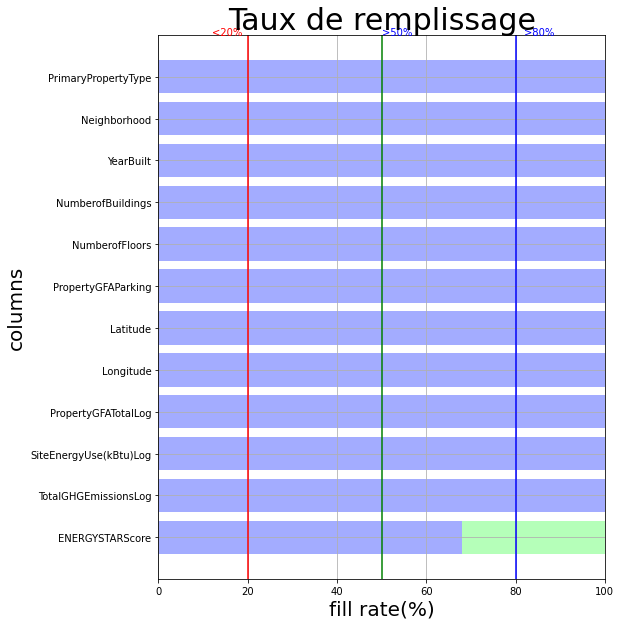

In [434]:
TraceValeurMissing(dataEtude)

In [435]:
dataEtude.shape 

(1689, 12)

In [436]:
Missing(dataEtude)

PrimaryPropertyType        0.000000
Neighborhood               0.000000
YearBuilt                  0.000000
NumberofBuildings          0.000000
NumberofFloors             0.000000
PropertyGFAParking         0.000000
ENERGYSTARScore           32.089994
Latitude                   0.000000
Longitude                  0.000000
PropertyGFATotalLog        0.000000
SiteEnergyUse(kBtu)Log     0.059207
TotalGHGEmissionsLog       0.059207
dtype: float64

### MCAR

In [437]:
PourcentageM=Missing(dataEtude)
to_change=list(PourcentageM[PourcentageM >0].index)
to_change
#8 variables que des variables quantitatives 

['ENERGYSTARScore', 'SiteEnergyUse(kBtu)Log', 'TotalGHGEmissionsLog']

In [438]:
Missing(dataEtude)

PrimaryPropertyType        0.000000
Neighborhood               0.000000
YearBuilt                  0.000000
NumberofBuildings          0.000000
NumberofFloors             0.000000
PropertyGFAParking         0.000000
ENERGYSTARScore           32.089994
Latitude                   0.000000
Longitude                  0.000000
PropertyGFATotalLog        0.000000
SiteEnergyUse(kBtu)Log     0.059207
TotalGHGEmissionsLog       0.059207
dtype: float64

In [439]:
#tableau des individus qui sont manquants ou pas
#on fait 1* pour mettre 0 ou 1 
#0 pas manquant et 1 manquant 
boo=dataEtude[to_change]
boo.head(20)

,ENERGYSTARScore,SiteEnergyUse(kBtu)Log,TotalGHGEmissionsLog
0,62.5,6.851432,2.397427
1,56.0,6.922781,2.445942
2,30.5,7.862479,3.317088
3,28.5,7.141432,2.872000
4,71.0,7.161282,2.704454
5,NaN,7.081682,2.481746
6,26.0,6.778205,2.282440
7,NaN,6.803577,2.323201
8,44.5,7.119504,2.557045
9,39.0,7.186237,2.800269


<AxesSubplot:>

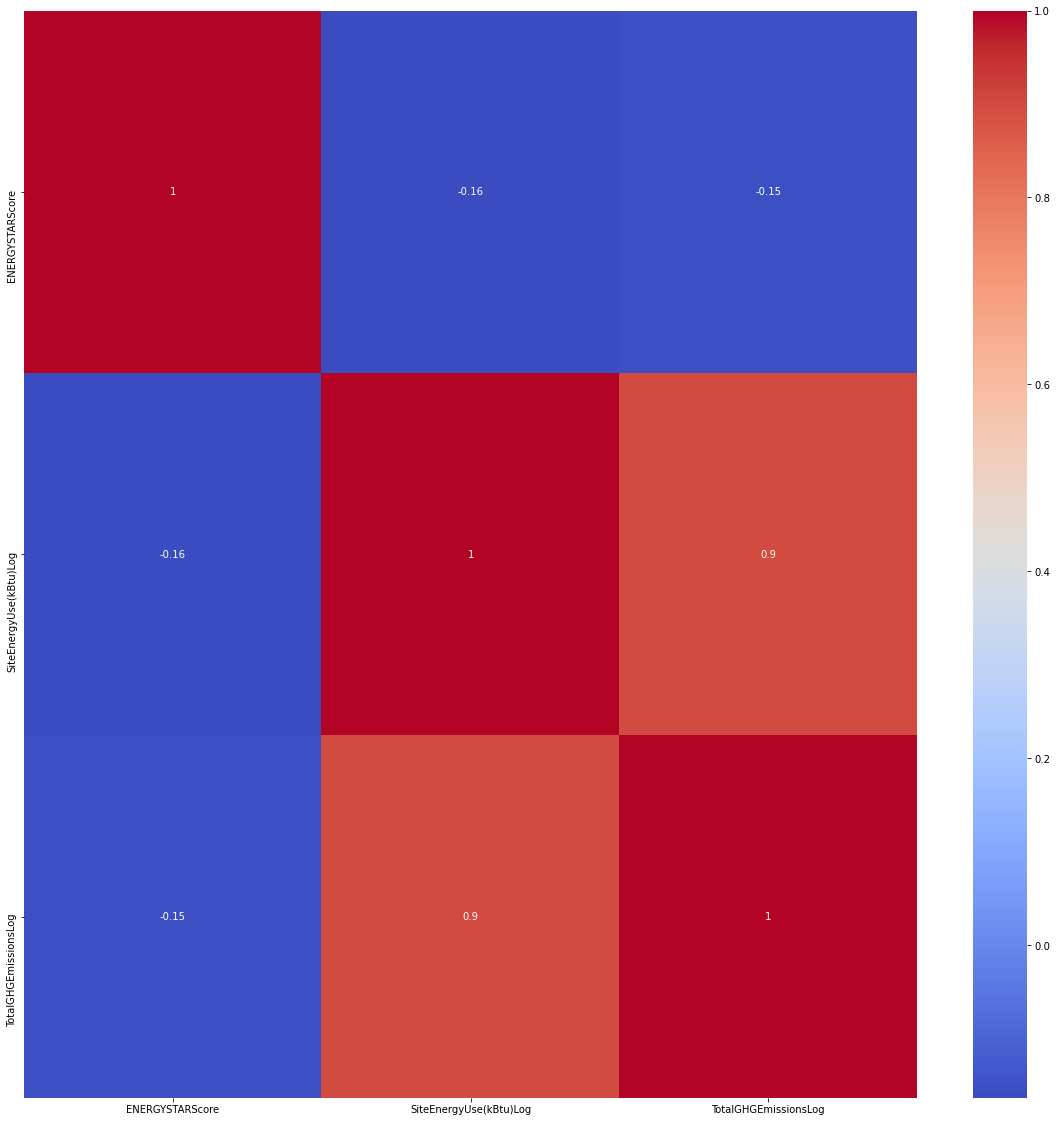

In [440]:
cor=boo.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

In [441]:
dataEtude.shape

(1689, 12)

## Gestion des valeurs manquantes 

In [442]:
Missing(dataEtude)

PrimaryPropertyType        0.000000
Neighborhood               0.000000
YearBuilt                  0.000000
NumberofBuildings          0.000000
NumberofFloors             0.000000
PropertyGFAParking         0.000000
ENERGYSTARScore           32.089994
Latitude                   0.000000
Longitude                  0.000000
PropertyGFATotalLog        0.000000
SiteEnergyUse(kBtu)Log     0.059207
TotalGHGEmissionsLog       0.059207
dtype: float64

In [443]:
dataEtude.ENERGYSTARScore.isna().sum()
#soit 32 % de valeurs manquantes on peut dire quelle est assez bien remplie 

542

In [444]:
dataEtude.ENERGYSTARScore.describe()
#la mediane est plus grande que la moyenne 72 et 64
#nous avons une asymetrie a gauche
#calculons le coefficient d'asymetrie en vue de confirmer cette hypothese

count    1147.000000
mean       64.846120
std        28.100521
min         1.000000
25%        46.500000
50%        72.000000
75%        88.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

In [445]:
skew=round(dataEtude.ENERGYSTARScore.skew(),3)
print("Skewness(Energystarscore) : {}".format(skew))
#coefficient  < 0 la donnée est étalée vers la gauche donc asymetrie 
#nous allons mputer par la mediane 

Skewness(Energystarscore) : -0.752


In [446]:
 # Calcul du coefficient de variation
cv=dataEtude.ENERGYSTARScore.describe().loc['std']/dataEtude.ENERGYSTARScore.describe().loc['mean']
"Dispersion par unité de moyenne : {}% ".format(round(cv*100,2))
#quel pourcentage de la moyenne represente lecart type 
#plus elle est grande plus les valeurs sont disperses 
#Nous avons le coef de variation < 15 % donc la population est homogene 
#on peut imputer par la moyenn e

'Dispersion par unité de moyenne : 43.33% '

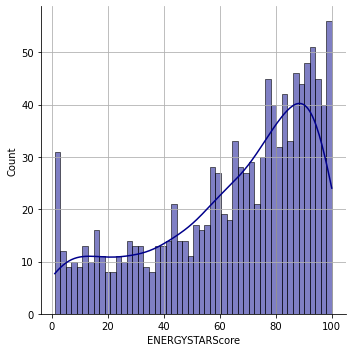

In [447]:
sns.displot(x='ENERGYSTARScore',data=dataEtude, kde=True, bins=50,color="darkblue")
plt.grid()

In [448]:
#imputation variable manquante avec la median 
from sklearn.impute import SimpleImputer
imput=SimpleImputer(missing_values=np.nan,strategy='median')
dataEtude['ENERGYSTARScore']=imput.fit_transform(dataEtude['ENERGYSTARScore'].values.reshape(dataEtude.shape[0],1))
dataEtude['ENERGYSTARScore'].isna().sum().all()#ou any

<ipython-input-448-a4e99dc04169>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEtude['ENERGYSTARScore']=imput.fit_transform(dataEtude['ENERGYSTARScore'].values.reshape(dataEtude.shape[0],1))


False

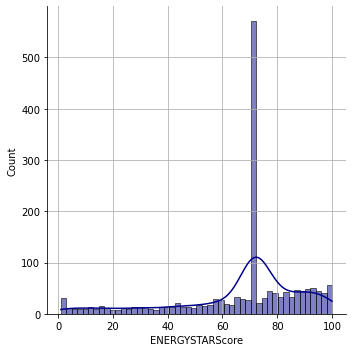

In [449]:
#graphique apres imputation
sns.displot(x='ENERGYSTARScore',data=dataEtude, kde=True, bins=50,color="darkblue")
plt.grid()

In [450]:
dataEtude['PropertyGFAParking'].isna().sum()

0

In [451]:
dataEtude['SiteEnergyUse(kBtu)Log'].isna().sum()

1

In [452]:
i=dataEtude['SiteEnergyUse(kBtu)Log'].isna()==True
dataEtude[i]

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,Latitude,Longitude,PropertyGFATotalLog,SiteEnergyUse(kBtu)Log,TotalGHGEmissionsLog
1226,School,NORTHWEST,1953,1.0,1.0,0.0,72.0,47.695489,-122.340188,5.044657,NaN,NaN


In [453]:
dataEtude=dataEtude.drop(index=dataEtude[i].index)

In [454]:
dataEtude['SiteEnergyUse(kBtu)Log'].isna().sum()

0

In [455]:
dataEtude['TotalGHGEmissionsLog'].isna().sum()

0

In [456]:
dataEtude['TotalGHGEmissionsLog'].describe()
#la moyenne est superieur a la mediane
#données etalee vers la droite 

count    1688.000000
mean        1.713376
std         0.658168
min        -0.508638
25%         1.306289
50%         1.699313
75%         2.144704
max         4.227140
Name: TotalGHGEmissionsLog, dtype: float64

In [457]:
skew=round(dataEtude['TotalGHGEmissionsLog'].skew(),3)
print("Skewness(totalghemission) : {}".format(skew))
#coefficient = 0.032 semble symetrique 
#calcul du coeff daplatissement 


Skewness(totalghemission) : 0.03


In [458]:
# Calcul du coefficient d'Applatissement
kurt=round(dataEtude['TotalGHGEmissionsLog'].kurtosis(),3)
print("Kurtosis(totalghemis) : {}" .format(kurt))
#on peut dire quon a une distribution meme aplatissement quune loi normale 
#on peut remarquer que les données sont assez bien remplis 

Kurtosis(totalghemis) : 0.474


In [459]:
 # Calcul du coefficient de variation
cv=dataEtude['TotalGHGEmissionsLog'].describe().loc['std']/dataEtude['TotalGHGEmissionsLog'].describe().loc['mean']
"Dispersion par unité de moyenne : {}% ".format(round(cv*100,2))
#quel pourcentage de la moyenne represente lecart type 
#plus elle est grande plus les valeurs sont disperses 
#Nous avons le coef de variation > 15 % donc la population est heterogene
#on peut imputer par la mediane

'Dispersion par unité de moyenne : 38.41% '

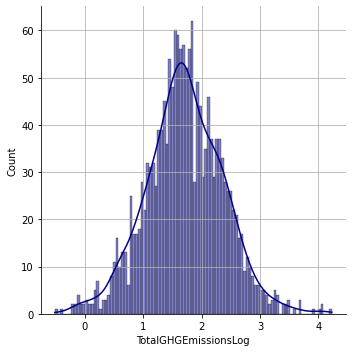

In [460]:
sns.displot(x='TotalGHGEmissionsLog',data=dataEtude, kde=True, bins=100,color="darkblue")
plt.grid()

In [461]:
Missing(dataEtude)

PrimaryPropertyType       0.0
Neighborhood              0.0
YearBuilt                 0.0
NumberofBuildings         0.0
NumberofFloors            0.0
PropertyGFAParking        0.0
ENERGYSTARScore           0.0
Latitude                  0.0
Longitude                 0.0
PropertyGFATotalLog       0.0
SiteEnergyUse(kBtu)Log    0.0
TotalGHGEmissionsLog      0.0
dtype: float64

# Analyse Univariée

In [478]:
df=dataEtude.describe()
df['NumberofFloors']

count    1688.000000
mean        4.055687
std         6.111916
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        76.000000
Name: NumberofFloors, dtype: float64

In [479]:
dataEtude['TotalGHGEmissionsLog'].describe()

count    1688.000000
mean        1.713376
std         0.658168
min        -0.508638
25%         1.306289
50%         1.699313
75%         2.144704
max         4.227140
Name: TotalGHGEmissionsLog, dtype: float64

array([[<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofBuildings'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>],
       [<AxesSubplot:title={'center':'PropertyGFAParking'}>,
        <AxesSubplot:title={'center':'ENERGYSTARScore'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'PropertyGFATotalLog'}>,
        <AxesSubplot:title={'center':'SiteEnergyUse(kBtu)Log'}>],
       [<AxesSubplot:title={'center':'TotalGHGEmissionsLog'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

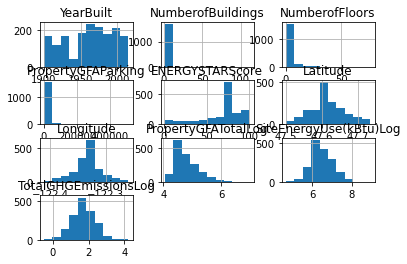

In [480]:
dataEtude.hist()

In [481]:
dataEtude.dtypes

PrimaryPropertyType        object
Neighborhood               object
YearBuilt                   int64
NumberofBuildings         float64
NumberofFloors            float64
PropertyGFAParking        float64
ENERGYSTARScore           float64
Latitude                  float64
Longitude                 float64
PropertyGFATotalLog       float64
SiteEnergyUse(kBtu)Log    float64
TotalGHGEmissionsLog      float64
dtype: object

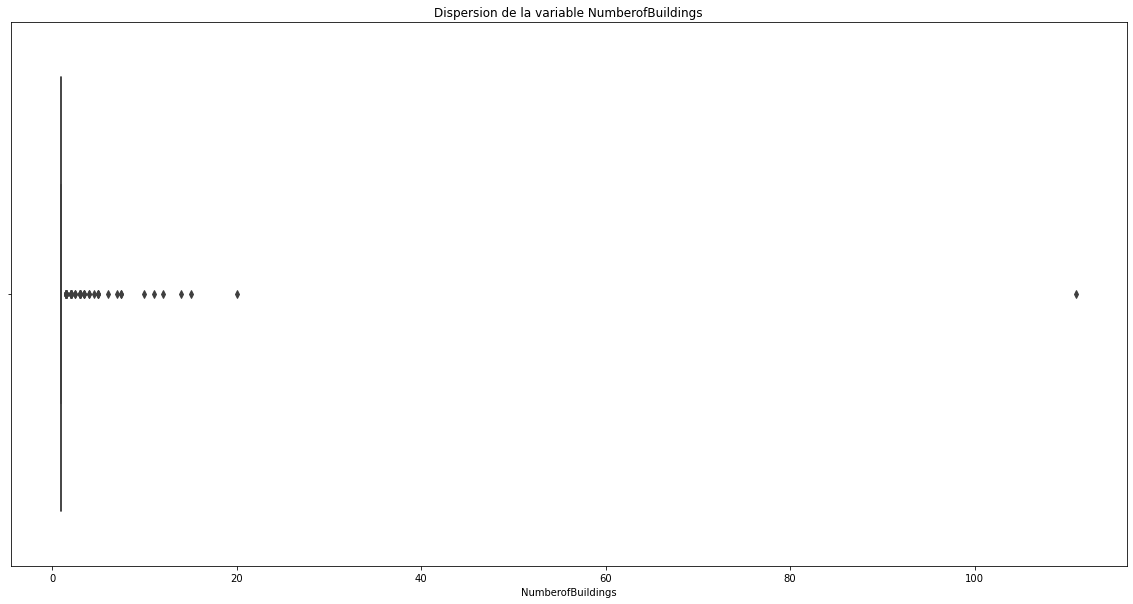

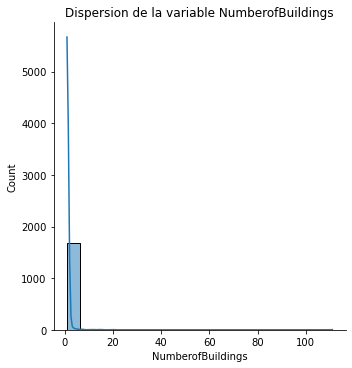

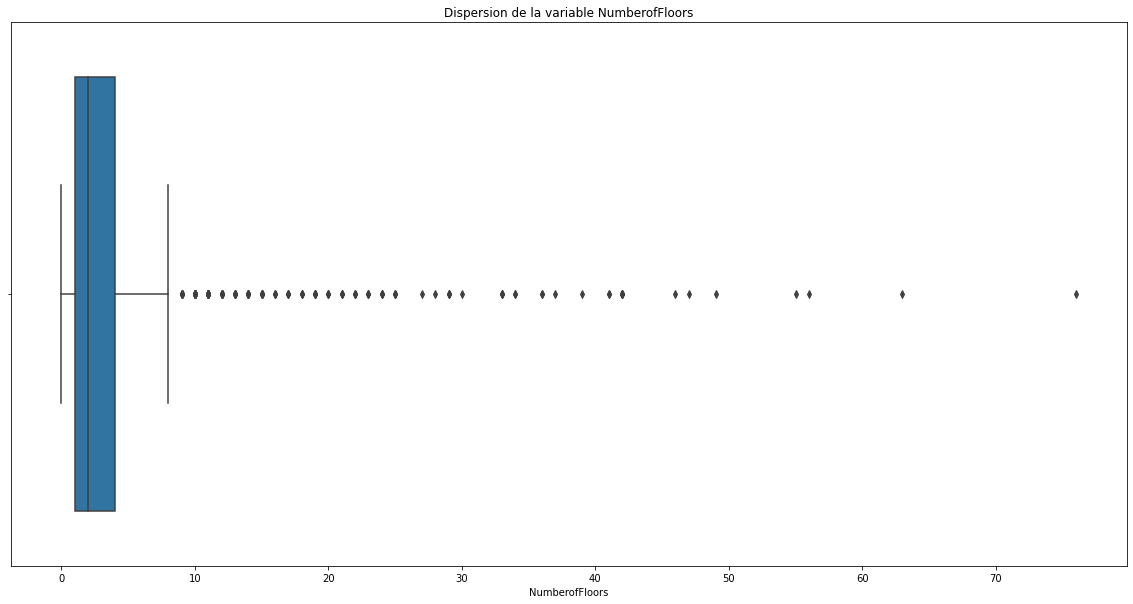

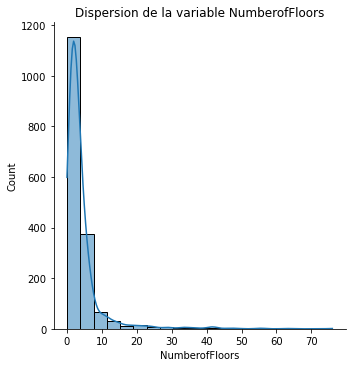

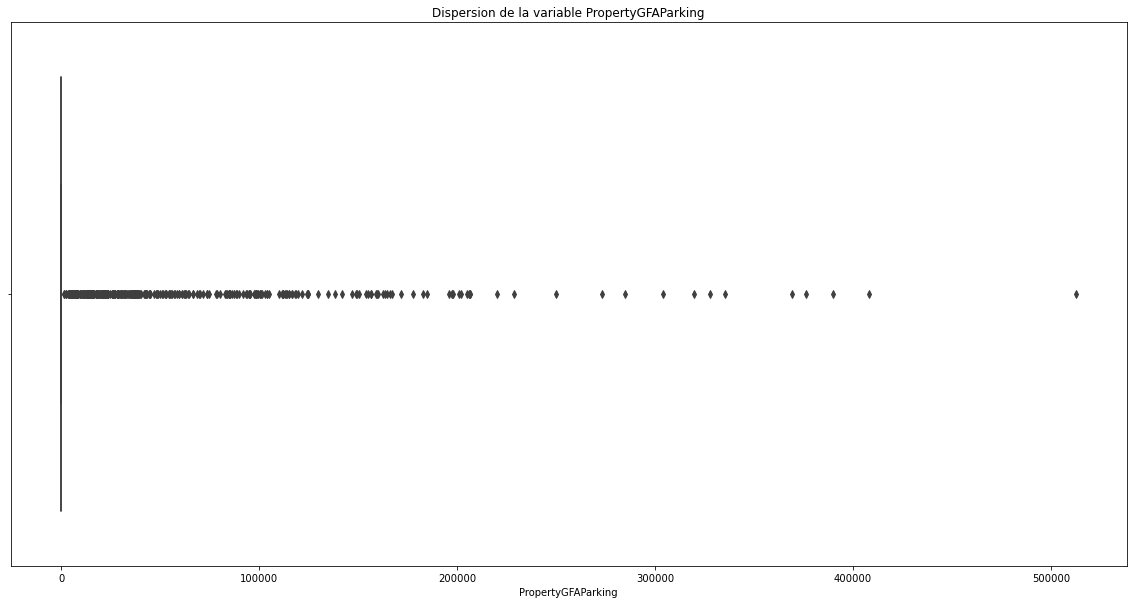

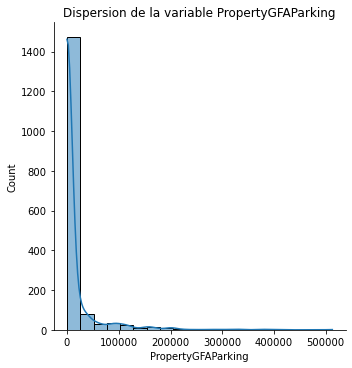

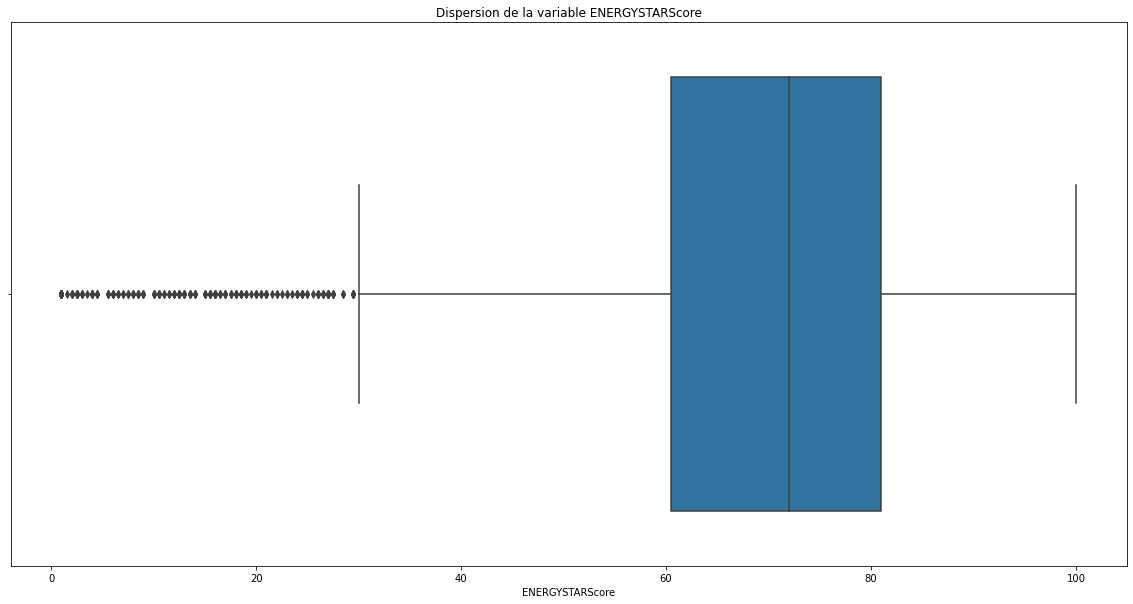

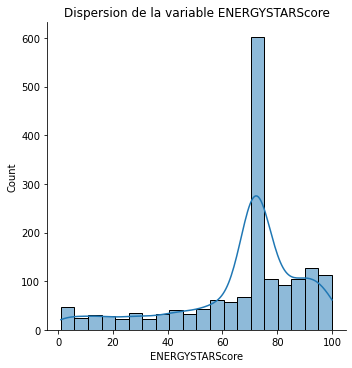

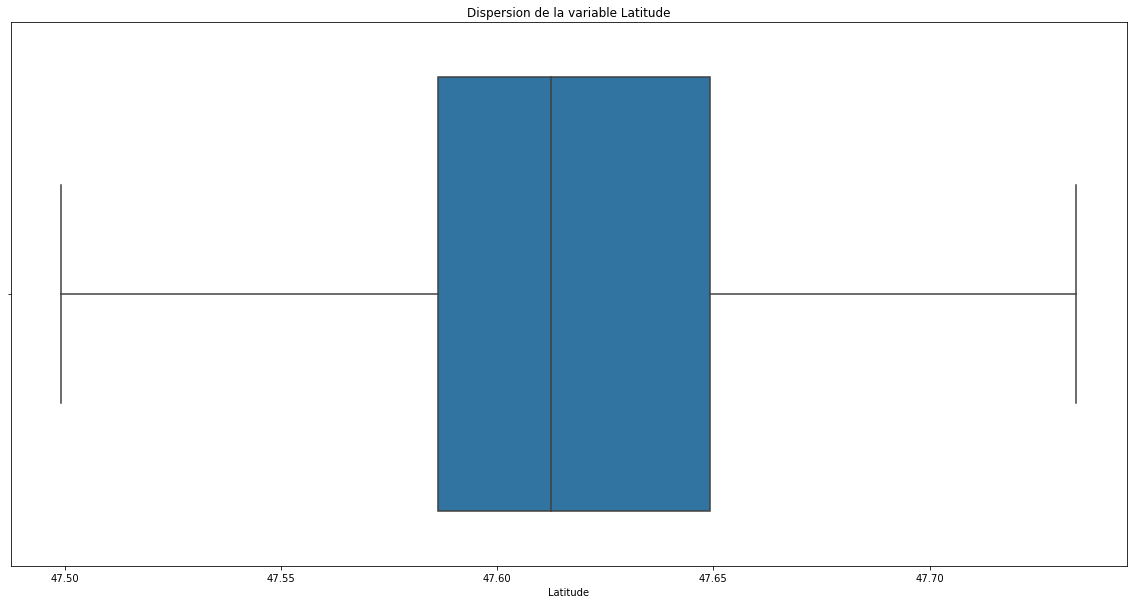

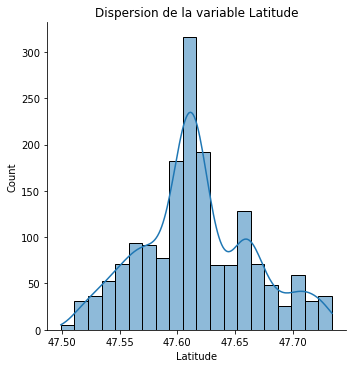

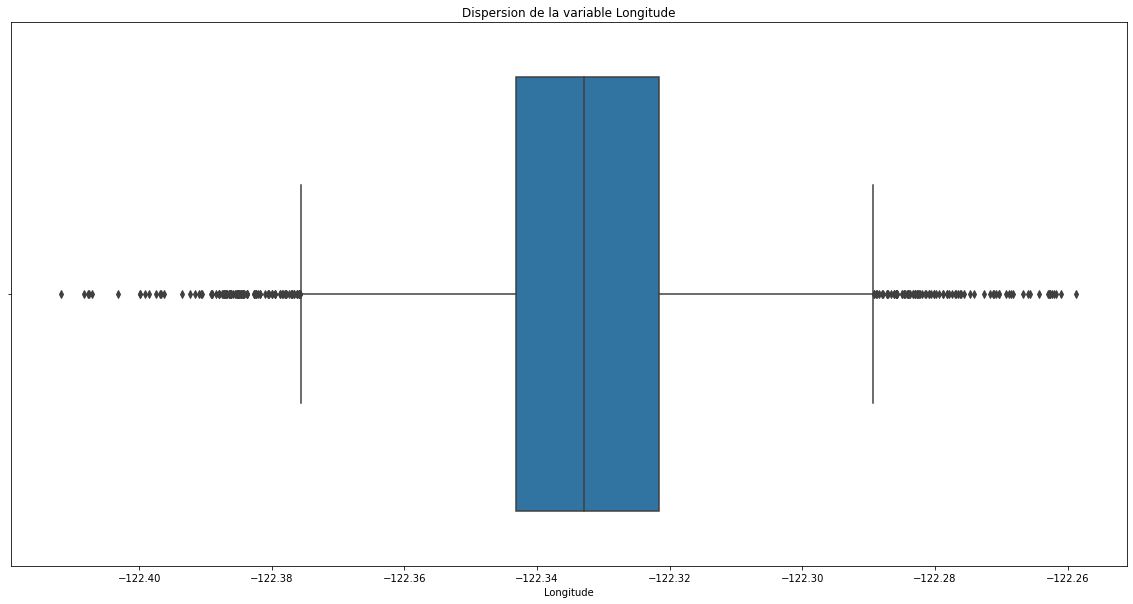

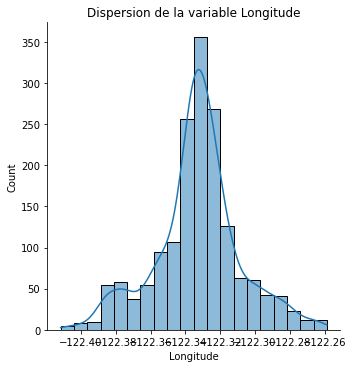

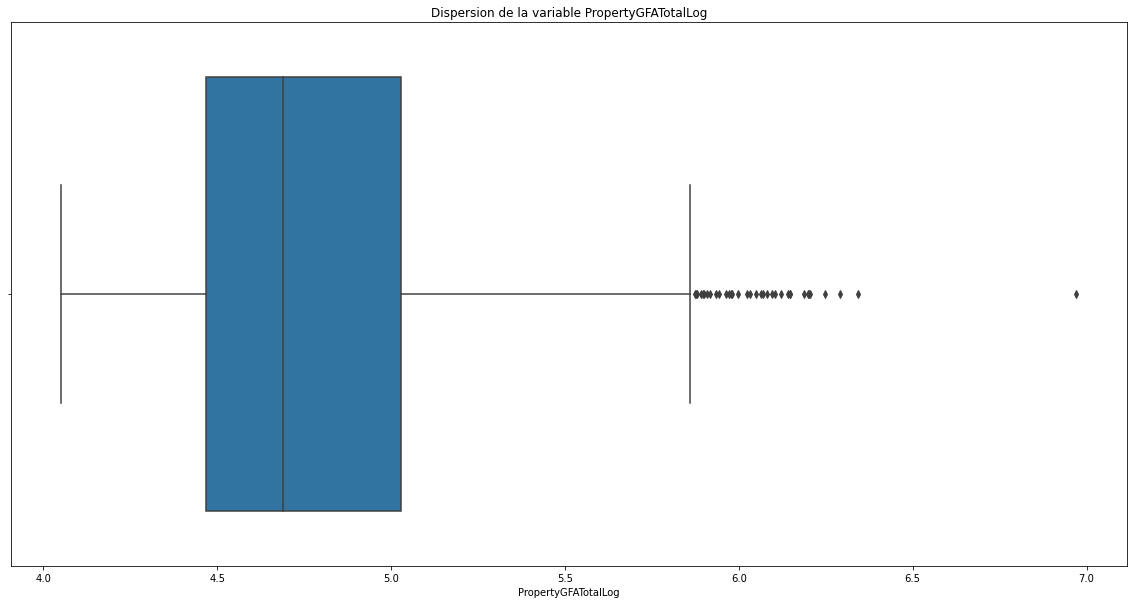

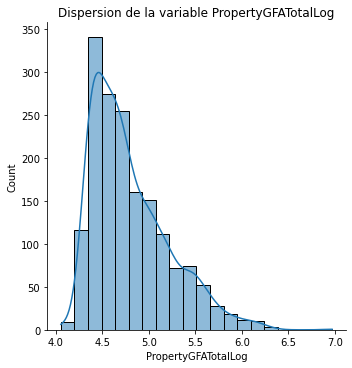

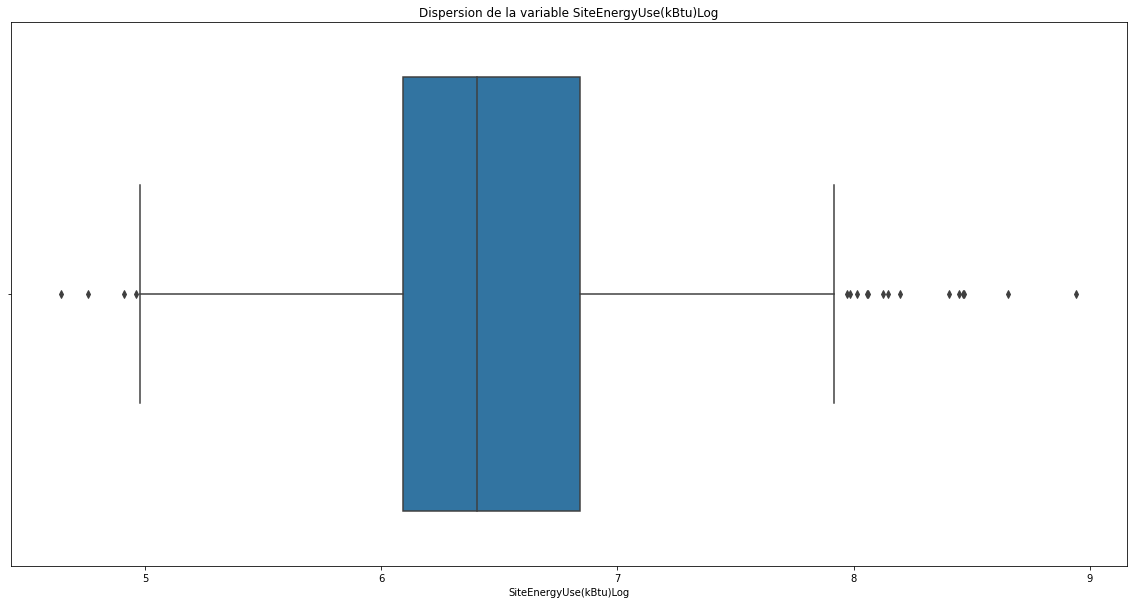

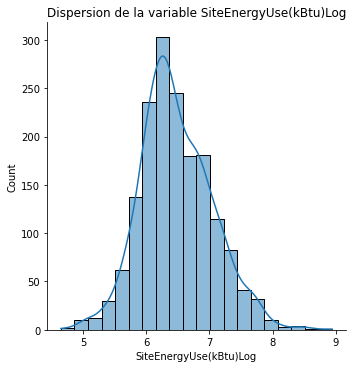

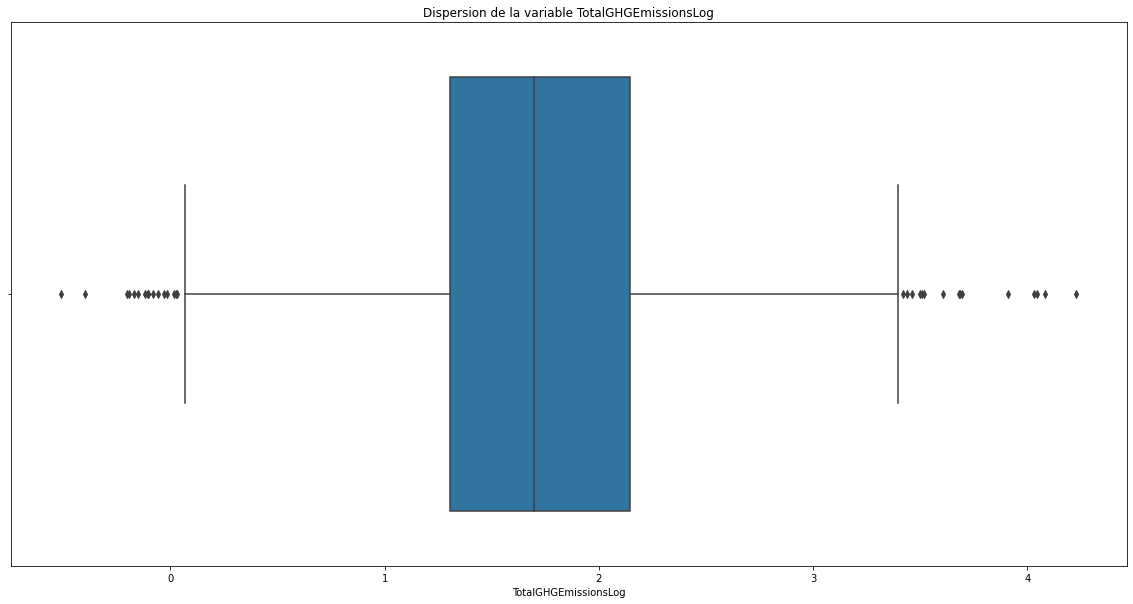

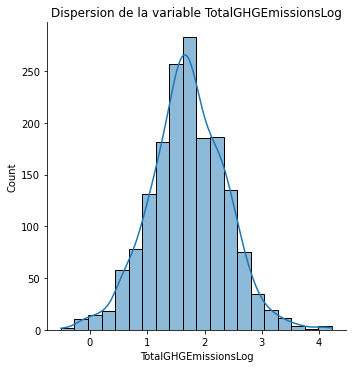

In [1247]:
for col in dataEtude.select_dtypes('float64').columns:
    TraceGraphique(dataEtude,col)

In [482]:
dataEtude['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'School', 'University',
       'Office', 'Self-Storage Facility', 'Warehouse', 'Medical', 'Store',
       'Residence', 'Distribution Center', 'Worship Facility',
       'Laboratory', 'Refrigerated Warehouse', 'Multifamily',
       'Restaurant'], dtype=object)

## Regroupement des modalites 

In [483]:
df=pd.DataFrame({'Modalite':dataEtude['PrimaryPropertyType'].value_counts().index,'effectif': dataEtude['PrimaryPropertyType'].value_counts().values})

<AxesSubplot:xlabel='effectif', ylabel='Modalite'>

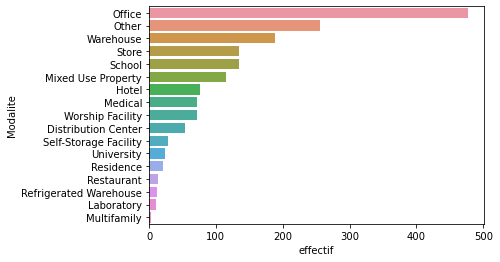

In [484]:
sns.barplot(y='Modalite',x='effectif',data=df.sort_values('effectif',ascending=False))

In [485]:
CATEGS={'ECOLE':['School', 'University'],'SOIN':['Medical'],'Laboratoire':['Laboratory'],\
       'BOUTIQUE':[ 'Store','Distribution Center'],'CULTE':['Worship Facility'],'RESIDENCE':['Mixed Use Property', 'Residence','Multifamily'],'RESTAURANT':['Restaurant'],\
       'BUREAU':['Office'],'Warehouse':['Warehouse','Self-Storage Facility'],'HOTEL':['Hotel'],'OTHER':['Other'],'REWarehouse':[ 'Refrigerated Warehouse']}

In [486]:
def compare_word(word):
    #Vérifier si 'word' est dans notre regroupement de modalites. 
    #Chaque catégorie est une clé de notre dico CATEG
    #cette fonction permet de chercher dans la colonne si ya une valeur si il est 
    #item on retourne la cle
    if word == ' 'or word == 'nan':
        pass
    for key, val in CATEGS.items():
        if word in val:
            return key 
    pass

In [487]:
def new_categ (data, lab):
    #On va creer une nouvelle colonne qui contient nos 18 modalites regrouper 
    #en 7 modalites qui contient les cles de CATEGS
   
    list_column=[] #creation d'une liste
    for lab in data[lab]:
        s=compare_word(lab)
        list_column.append(s)
    
    return list_column

In [488]:
dataEtude['PrimaryPropertyType']=new_categ(dataEtude, lab='PrimaryPropertyType')

In [489]:
dataEtude['PrimaryPropertyType'].unique()

array(['HOTEL', 'OTHER', 'RESIDENCE', 'ECOLE', 'BUREAU', 'Warehouse',
       'SOIN', 'BOUTIQUE', 'CULTE', 'Laboratoire', 'REWarehouse',
       'RESTAURANT'], dtype=object)

In [490]:
df=pd.DataFrame({'Modalite':dataEtude['PrimaryPropertyType'].value_counts().index,'effectif': dataEtude['PrimaryPropertyType'].value_counts().values})

<AxesSubplot:xlabel='effectif', ylabel='Modalite'>

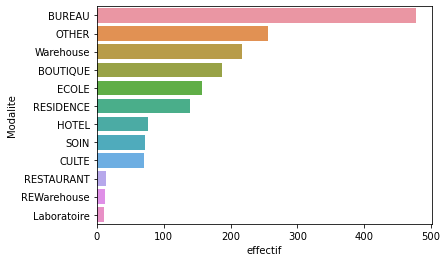

In [491]:
sns.barplot(y='Modalite',x='effectif',data=df.sort_values('effectif',ascending=False))

In [494]:
dataEtude['Neighborhood'].unique().shape, dataEtude['PrimaryPropertyType'].unique().shape

((13,), (12,))

In [495]:
df=pd.DataFrame({'Modalite':dataEtude['Neighborhood'].value_counts().index,'effectif': dataEtude['Neighborhood'].value_counts().values})

<AxesSubplot:xlabel='effectif', ylabel='Modalite'>

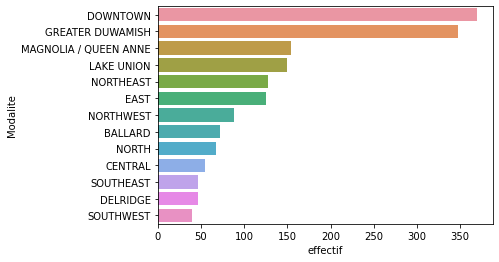

In [496]:
sns.barplot(y='Modalite',x='effectif',data=df.sort_values('effectif',ascending=False))

In [497]:
CATE={'EAST':['SOUTHEAST', 'NORTHEAST', 'EAST'],'WEST':['NORTHWEST','SOUTHWEST'],'DOWNTOWN':['DOWNTOWN'],'GREATER':['GREATER DUWAMISH'],'MAGQUEE':['MAGNOLIA / QUEEN ANNE'],
      
       'BALLARD':['BALLARD'],'CENTRAL':['CENTRAL'],'DELRIDGE':['DELRIDGE'],'NORTH':['NORTH'],'LAKE':['LAKE UNION']}

In [498]:
def compare_word(word):
    #Vérifier si 'word' est dans notre regroupement de modalites. 
    #Chaque catégorie est une clé de notre dico CATEG
    #cette fonction permet de chercher dans la colonne si ya une valeur si il est 
    #item on retourne la cle
    if word == ' ' or word == 'nan':
        pass
    for key, val in CATE.items():
        if word in val:
            return key 
    pass

In [499]:
def new_categ (dataBuilding, lab):
    #On va creer une nouvelle colonne qui contient nos 18 modalites regrouper 
    #en 7 modalites qui contient les cles de CATEGS
   
    list_column=[] #creation d'une liste
    for lab in dataBuilding[lab]:
        s=compare_word(lab)
        list_column.append(s)
    
    return list_column

In [500]:
dataEtude['Neighborhood']=new_categ(dataEtude, lab='Neighborhood')

In [501]:
dataEtude['Neighborhood'].unique()

array(['DOWNTOWN', 'EAST', 'NORTH', 'LAKE', 'GREATER', 'MAGQUEE',
       'BALLARD', 'WEST', 'CENTRAL', 'DELRIDGE'], dtype=object)

In [502]:
dataEtude.describe(include='O')


,PrimaryPropertyType,Neighborhood
count,1688,1688
unique,12,10
top,BUREAU,DOWNTOWN
freq,477,369


In [503]:
dataEtude.shape

(1688, 12)

In [504]:
dataEtude.select_dtypes('object').columns

Index(['PrimaryPropertyType', 'Neighborhood'], dtype='object')

In [505]:
dataEtude['Neighborhood'].value_counts()

DOWNTOWN    369
GREATER     347
EAST        300
MAGQUEE     154
LAKE        150
WEST        128
BALLARD      72
NORTH        67
CENTRAL      55
DELRIDGE     46
Name: Neighborhood, dtype: int64

In [506]:
df=pd.DataFrame({'Modalite':dataEtude['Neighborhood'].value_counts().index,'NMbre': dataEtude['Neighborhood'].value_counts().values})

<AxesSubplot:xlabel='NMbre', ylabel='Modalite'>

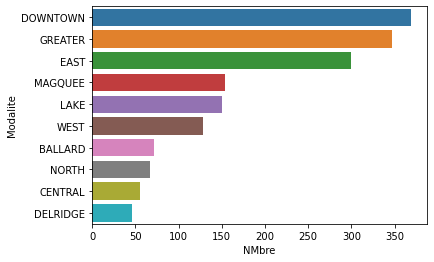

In [507]:
sns.barplot(y='Modalite',x='NMbre',data=df.sort_values('NMbre',ascending=False))

# Analyse bivariée 

In [508]:
dataEtude.select_dtypes('object').columns

Index(['PrimaryPropertyType', 'Neighborhood'], dtype='object')

## Qualitative et qualitative 

In [509]:
t=pd.pivot_table(dataEtude[['PrimaryPropertyType','Neighborhood']],index='Neighborhood',columns='PrimaryPropertyType',aggfunc=len,dropna=False,margins=True,margins_name='Total')

In [510]:
t

PrimaryPropertyType,BOUTIQUE,BUREAU,CULTE,ECOLE,HOTEL,Laboratoire,OTHER,RESIDENCE,RESTAURANT,REWarehouse,SOIN,Warehouse,Total
Neighborhood,,,,,,,,,,,,,
BALLARD,10.0,14.0,6.0,9.0,1.0,NaN,12.0,6.0,1.0,NaN,2.0,11.0,72
CENTRAL,3.0,11.0,2.0,17.0,NaN,NaN,11.0,2.0,NaN,NaN,6.0,3.0,55
DELRIDGE,11.0,6.0,2.0,9.0,NaN,NaN,11.0,NaN,NaN,NaN,1.0,6.0,46
DOWNTOWN,21.0,197.0,2.0,6.0,42.0,2.0,43.0,34.0,8.0,NaN,5.0,9.0,369
EAST,31.0,37.0,29.0,52.0,11.0,1.0,46.0,42.0,NaN,NaN,36.0,15.0,300
GREATER,61.0,54.0,1.0,12.0,2.0,NaN,52.0,18.0,NaN,12.0,NaN,135.0,347
LAKE,9.0,79.0,1.0,6.0,10.0,5.0,7.0,19.0,3.0,NaN,3.0,8.0,150
MAGQUEE,11.0,57.0,7.0,12.0,6.0,2.0,33.0,9.0,NaN,NaN,2.0,15.0,154
NORTH,11.0,10.0,3.0,9.0,NaN,NaN,19.0,4.0,NaN,NaN,7.0,4.0,67


In [511]:
d=t.dropna()

In [512]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(d)

In [513]:
st_p 
# H0 independance de la premiere utilisation de la propriete  et voisinage  
#H1 dependance 
#pvalue > 0.05 on accepte H0
# veut dire la connaissance de la marque  n'a aucune incidence sur la connaissance du nutriscore 


1.0

## Quantitative et quantitative

<AxesSubplot:>

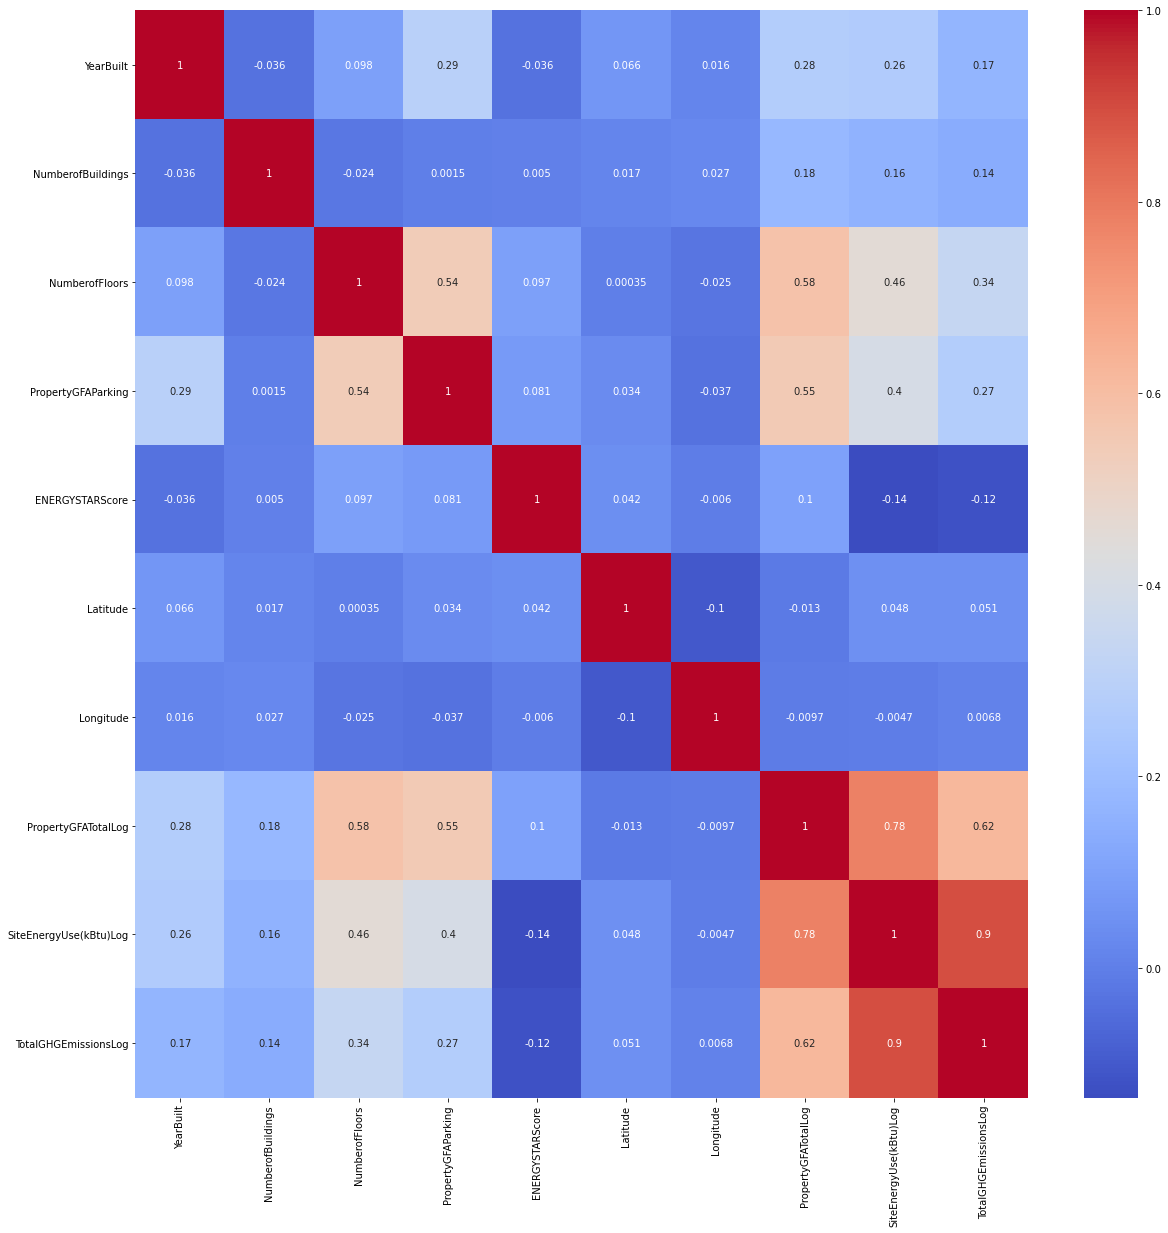

In [514]:
cor=dataEtude.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

## Quantitative et qualitative 

In [515]:
dataEtude.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking', 'ENERGYSTARScore', 'Latitude',
       'Longitude', 'PropertyGFATotalLog', 'SiteEnergyUse(kBtu)Log',
       'TotalGHGEmissionsLog'],
      dtype='object')

### Siteenrgyuse et neighborhood

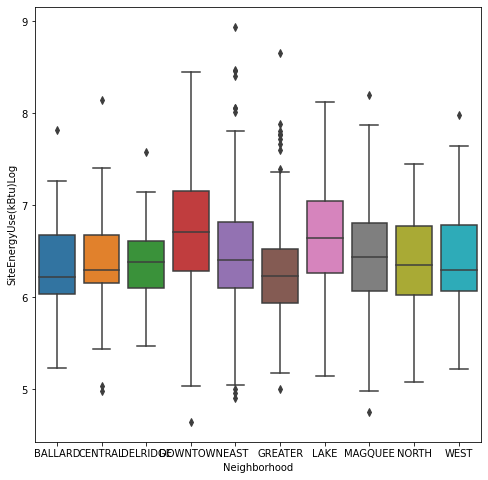

In [516]:
#on veut savoir si une variable qualitative va influencer 

plt.figure(figsize=(8,8))
ax = sns.boxplot(x='Neighborhood', y='SiteEnergyUse(kBtu)Log', data=dataEtude.sort_values(['Neighborhood']))

plt.show()

### Siteenergyuse et primary

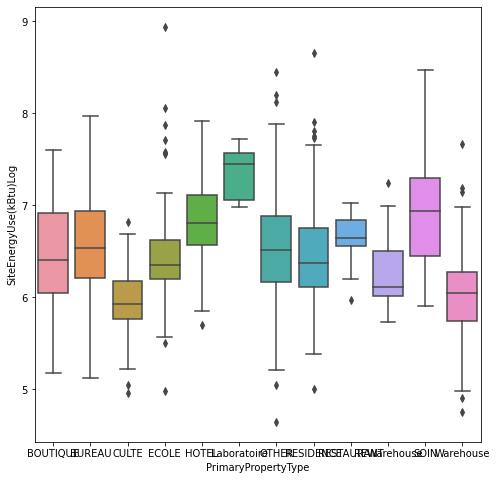

In [517]:
#on veut savoir si une variable qualitative va influencer 
#sur une variable quantitative 
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)Log', data=dataEtude.sort_values(['PrimaryPropertyType']))

plt.show()

### Totalghemission et primary

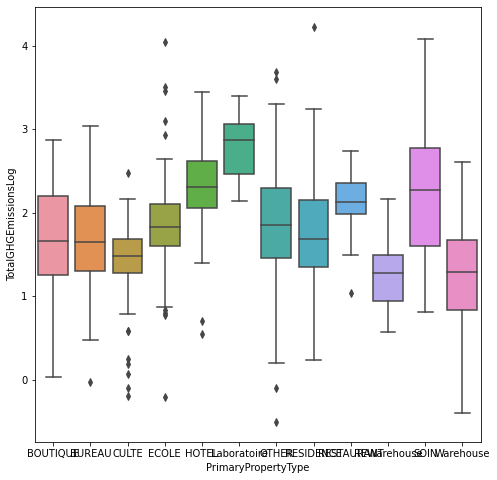

In [518]:
#on veut savoir si une variable qualitative va influencer 
#sur une variable quantitative 
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='PrimaryPropertyType', y='TotalGHGEmissionsLog', data=dataEtude.sort_values(['PrimaryPropertyType']))

plt.show()

### Total ghemission et neighborhood

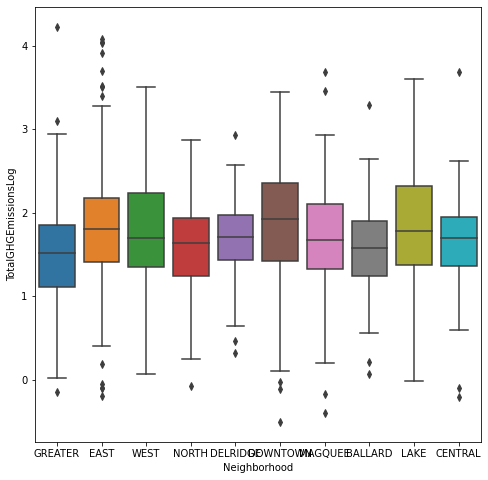

In [519]:
#on veut savoir si une variable qualitative va influencer 
#sur une variable quantitative 
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='Neighborhood', y='TotalGHGEmissionsLog', data=dataEtude.sort_values(['PrimaryPropertyType']))

plt.show()

# Analyse multivariée 

## Test de la normalite 

In [520]:
from scipy import stats
shapiro_test = stats.shapiro(dataEtude['SiteEnergyUse(kBtu)Log'])

In [521]:
shapiro_test

ShapiroResult(statistic=0.9898470640182495, pvalue=1.8197037210399003e-09)

In [522]:
shapiro_test = stats.shapiro(dataEtude['TotalGHGEmissionsLog'])

In [523]:
shapiro_test

ShapiroResult(statistic=0.9967976808547974, pvalue=0.0014271619729697704)

## Test krushall wallis

In [525]:
from pingouin import kruskal
kruskal(data=dataEtude,dv='TotalGHGEmissionsLog',between='Neighborhood')

,Source,ddof1,H,p-unc
Kruskal,Neighborhood,9,83.958641,2.632864e-14


In [526]:
kruskal(data=dataEtude,dv='TotalGHGEmissionsLog',between='PrimaryPropertyType')

,Source,ddof1,H,p-unc
Kruskal,PrimaryPropertyType,11,274.401449,2.128645e-52


In [527]:
kruskal(data=dataEtude,dv='SiteEnergyUse(kBtu)Log',between='PrimaryPropertyType')

,Source,ddof1,H,p-unc
Kruskal,PrimaryPropertyType,11,351.254748,1.315272e-68


In [528]:
kruskal(data=dataEtude,dv='SiteEnergyUse(kBtu)Log',between='Neighborhood')

,Source,ddof1,H,p-unc
Kruskal,Neighborhood,9,151.942726,3.490511e-28


# Graphiques interessants 

Text(0.5, 1.0, 'Graphe des propery type')

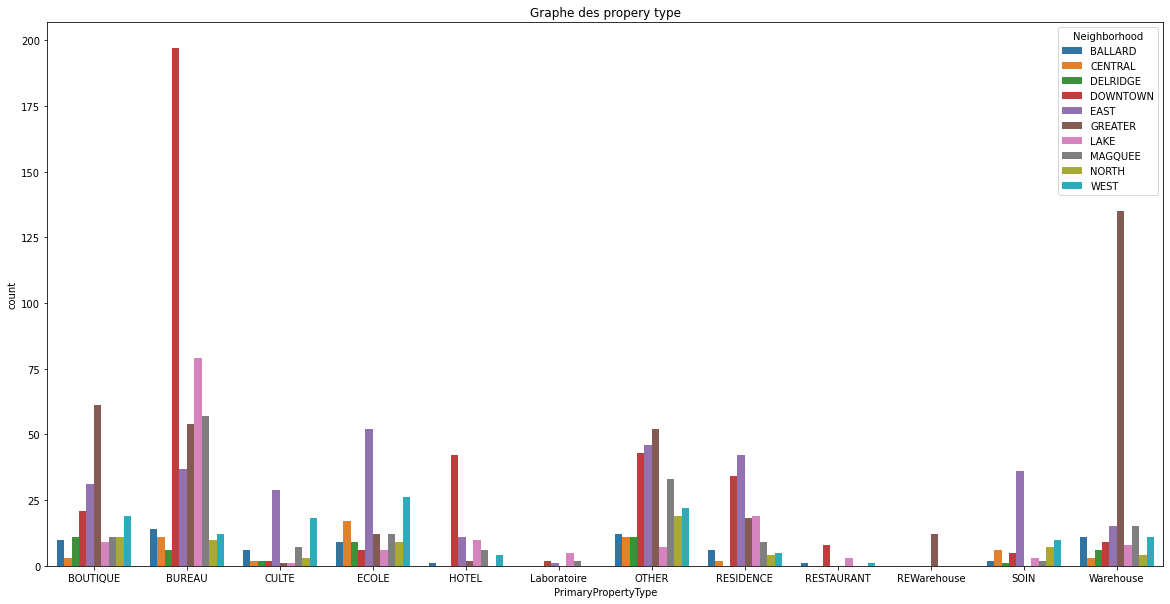

In [529]:
plt.figure(figsize=(20,10))
sns.countplot(x=dataEtude['PrimaryPropertyType'].sort_values(ascending=True),hue=dataEtude['Neighborhood'].sort_values(ascending=True))
plt.title('Graphe des propery type')

<Figure size 1440x720 with 0 Axes>

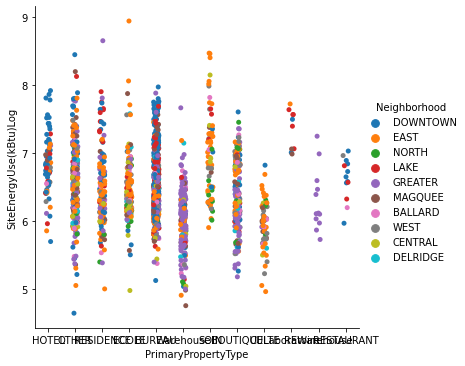

In [530]:
plt.figure(figsize=(20,10))
sns.catplot(x='PrimaryPropertyType',y='SiteEnergyUse(kBtu)Log',hue='Neighborhood',data=dataEtude)

<Figure size 1440x720 with 0 Axes>

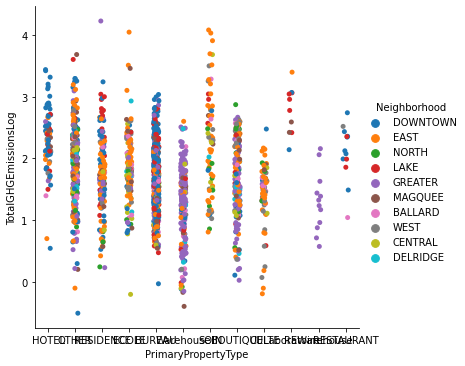

In [531]:
plt.figure(figsize=(20,10))
sns.catplot(x='PrimaryPropertyType',y='TotalGHGEmissionsLog',hue='Neighborhood',data=dataEtude)

In [532]:
Missing(dataEtude)

PrimaryPropertyType       0.0
Neighborhood              0.0
YearBuilt                 0.0
NumberofBuildings         0.0
NumberofFloors            0.0
PropertyGFAParking        0.0
ENERGYSTARScore           0.0
Latitude                  0.0
Longitude                 0.0
PropertyGFATotalLog       0.0
SiteEnergyUse(kBtu)Log    0.0
TotalGHGEmissionsLog      0.0
dtype: float64

In [533]:
dataEtude.shape

(1688, 12)

# Exportation base finale 

In [523]:
dataEtude.to_csv('BaseNettoye.csv')
#export de notre base nettoyée 